In [1]:
import os
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
WORK_DIR = r'lunyu_20191012'

In [3]:
CHAPTER_FILES = [
	["學而", "01 Xue Er.txt"],
	["為政", "02 Wei Zheng.txt"],
	["八佾", "03 Ba Yi.txt"],
	["里仁", "04 Li Ren.txt"],
	["公冶長", "05 Gong Ye Chang.txt"],
	["雍也", "06 Yong Ye.txt"],
	["述而", "07 Shu Er.txt"],
	["泰伯", "08 Tai Bo.txt"],
	["子罕", "09 Zi Han.txt"],
	["鄉黨", "10 Xiang Dang.txt"],
	["先進", "11 Xian Jin.txt"],
	["顏淵", "12 Yan Yuan.txt"],
	["子路", "13 Zi Lu.txt"],
	["憲問", "14 Xian Wen.txt"],
	["衛靈公", "15 Wei Ling Gong.txt"],
	["季氏", "16 Ji Shi.txt"],
	["陽貨", "17 Yang Huo.txt"],
	["微子", "18 Wei Zi.txt"],
	["子張", "19 Zi Zhang.txt"],
	["堯曰", "20 Yao Yue.txt"]
]


In [4]:
for fname in os.listdir(WORK_DIR):
    print(fname)

01 Xue Er.txt
02 Wei Zheng.txt
03 Ba Yi.txt
04 Li Ren.txt
05 Gong Ye Chang.txt
06 Yong Ye.txt
07 Shu Er.txt
08 Tai Bo.txt
09 Zi Han.txt
10 Xiang Dang.txt
11 Xian Jin.txt
12 Yan Yuan.txt
13 Zi Lu.txt
14 Xian Wen.txt
15 Wei Ling Gong.txt
16 Ji Shi.txt
17 Yang Huo.txt
18 Wei Zi.txt
19 Zi Zhang.txt
20 Yao Yue.txt
Lunyu_Analysis.ipynb


In [5]:
def extract_chapter_lines():
    text_list = []
    for chapter_idx, (chapter, fname) in enumerate(CHAPTER_FILES):
        print("processing file:{}".format(fname))
        fpath = os.path.join(WORK_DIR, fname)
        if not os.path.exists(fpath):
            print("can't find file {} for chapter:{}".format(fname, chapter))
            continue
        with open(fpath, encoding='UTF-8') as fi:
            section_idx = 0
            for cnt, line in enumerate(fi):
                line = line.strip()
                if not line:
                    continue
                section_idx += 1
                text_list.append([chapter_idx + 1, chapter, section_idx, line])
                if cnt % 10 == 0:
                    print("processing cnt:{}".format(cnt))
    return text_list

In [6]:
text_list = extract_chapter_lines()

processing file:01 Xue Er.txt
processing cnt:10
processing file:02 Wei Zheng.txt
processing cnt:10
processing cnt:20
processing file:03 Ba Yi.txt
processing cnt:10
processing cnt:20
processing file:04 Li Ren.txt
processing cnt:10
processing cnt:20
processing file:05 Gong Ye Chang.txt
processing cnt:10
processing cnt:20
processing file:06 Yong Ye.txt
processing cnt:10
processing cnt:20
processing cnt:30
processing file:07 Shu Er.txt
processing cnt:10
processing cnt:20
processing cnt:30
processing file:08 Tai Bo.txt
processing cnt:10
processing cnt:20
processing file:09 Zi Han.txt
processing cnt:10
processing cnt:20
processing cnt:30
processing file:10 Xiang Dang.txt
processing cnt:10
processing file:11 Xian Jin.txt
processing cnt:10
processing cnt:20
processing file:12 Yan Yuan.txt
processing cnt:10
processing cnt:20
processing file:13 Zi Lu.txt
processing cnt:10
processing cnt:20
processing cnt:30
processing file:14 Xian Wen.txt
processing cnt:10
processing cnt:20
processing cnt:30
pro

In [7]:
len(text_list)

503

In [8]:
analects_df = pd.DataFrame(text_list, columns=['chapter_idx', 'chapter', 'section_idx', 'content'])

In [9]:
analects_df

,chapter_idx,chapter,section_idx,content
0,1,學而,1,子曰：「學而時習之，不亦說乎？有朋自遠方來，不亦樂乎？人不知而不慍，不亦君子乎？」
1,1,學而,2,有子曰：「其為人也孝弟，而好犯上者，鮮矣；不好犯上，而好作亂者，未之有也。君子務本，本立而道...
2,1,學而,3,子曰：「巧言令色，鮮矣仁！」
3,1,學而,4,曾子曰：「吾日三省吾身：為人謀而不忠乎？與朋友交而不信乎？傳不習乎？」
4,1,學而,5,子曰：「道千乘之國：敬事而信，節用而愛人，使民以時。」
5,1,學而,6,子曰：「弟子入則孝，出則弟，謹而信，汎愛眾，而親仁。行有餘力，則以學文。」
6,1,學而,7,子夏曰：「賢賢易色，事父母能竭其力，事君能致其身，與朋友交言而有信。雖曰未學，吾必謂之學矣。」
7,1,學而,8,子曰：「君子不重則不威，學則不固。主忠信，無友不如己者，過則勿憚改。」
8,1,學而,9,曾子曰：「慎終追遠，民德歸厚矣。」
9,1,學而,10,子禽問於子貢曰：「夫子至於是邦也，必聞其政，求之與？抑與之與？」子貢曰：「夫子溫、良、恭、儉...


In [10]:
analects_df.groupby('chapter').agg({'chapter_idx':'min', 'content':'count'}).sort_values('chapter_idx')

,chapter_idx,content
chapter,,
學而,1,16
為政,2,24
八佾,3,26
里仁,4,26
公冶長,5,28
雍也,6,30
述而,7,38
泰伯,8,21
子罕,9,31


In [11]:
def count_char(line):
    if line is None:
        return 0
    return len(line)

In [12]:
PUNC_REGEX = r'：|「|，|。|」|『|』|？|《|》|；|！|、'
def count_raw_char(line):
    raw_line = re.sub(PUNC_REGEX, '', line)
    return count_char(raw_line)

def show_raw_char(line):
    print(re.sub(PUNC_REGEX, '', line))

In [13]:
def get_sentences(line):
    raw_sentences = re.split("：|，|。|；|？|！", line)
    sentences = []
    for s in raw_sentences:
        sentence = re.sub(PUNC_REGEX, '', s)
        if sentence:
            sentences.append(sentence)
    return sentences

In [14]:
def get_sub_sentences_cnt(data):
    if data and type(data) == list:
        return len(data)
    return 0

In [15]:
def get_spoken_words_len(data):
    result_list = re.findall(r"「.*?」", data)
    if not result_list:
        return 0
    words_len = 0
    for result in result_list:
        words_len += count_raw_char(result)
    return words_len


In [16]:
def get_spoken_times(content):
    results = re.findall(r'「.*?」', content)
    if results:
        return len(results)
    return 0

In [17]:
def show_content(keyword):
    return analects_df[analects_df.content.apply(lambda x: keyword in x)]

In [18]:
def count_content(keyword):
    return analects_df[analects_df.content.apply(lambda x: keyword in x)].content.count()

In [19]:
get_sentences(analects_df['content'].loc[0])

['子曰', '學而時習之', '不亦說乎', '有朋自遠方來', '不亦樂乎', '人不知而不慍', '不亦君子乎']

In [20]:
analects_df['content'].loc[0]

'子曰：「學而時習之，不亦說乎？有朋自遠方來，不亦樂乎？人不知而不慍，不亦君子乎？」'

In [21]:
count_raw_char(analects_df['content'].loc[0])

32

In [22]:
# 统计每章节加标点版本的字数
analects_df['char_cnt'] = analects_df['content'].apply(count_char)
# 统计每章节加原始字数（去除标点）
analects_df['raw_char_cnt'] = analects_df['content'].apply(count_raw_char)
# 拆分为子句列表
analects_df['sentences'] = analects_df['content'].apply(get_sentences)
# 子句的数量
analects_df['sentences_cnt'] = analects_df['sentences'].apply(get_sub_sentences_cnt)
# 提取谈话次数
analects_df['speak_times'] = analects_df.content.apply(get_spoken_times)
# 提取谈话内容字数
analects_df['speak_len'] = analects_df.content.apply(get_spoken_words_len)


In [23]:
analects_df

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
0,1,學而,1,子曰：「學而時習之，不亦說乎？有朋自遠方來，不亦樂乎？人不知而不慍，不亦君子乎？」,41,32,"[子曰, 學而時習之, 不亦說乎, 有朋自遠方來, 不亦樂乎, 人不知而不慍, 不亦君子乎]",7,1,30
1,1,學而,2,有子曰：「其為人也孝弟，而好犯上者，鮮矣；不好犯上，而好作亂者，未之有也。君子務本，本立而道...,61,48,"[有子曰, 其為人也孝弟, 而好犯上者, 鮮矣, 不好犯上, 而好作亂者, 未之有也, 君子...",11,1,45
2,1,學而,3,子曰：「巧言令色，鮮矣仁！」,14,9,"[子曰, 巧言令色, 鮮矣仁]",3,1,7
3,1,學而,4,曾子曰：「吾日三省吾身：為人謀而不忠乎？與朋友交而不信乎？傳不習乎？」,35,28,"[曾子曰, 吾日三省吾身, 為人謀而不忠乎, 與朋友交而不信乎, 傳不習乎]",5,1,25
4,1,學而,5,子曰：「道千乘之國：敬事而信，節用而愛人，使民以時。」,27,20,"[子曰, 道千乘之國, 敬事而信, 節用而愛人, 使民以時]",5,1,18
5,1,學而,6,子曰：「弟子入則孝，出則弟，謹而信，汎愛眾，而親仁。行有餘力，則以學文。」,37,27,"[子曰, 弟子入則孝, 出則弟, 謹而信, 汎愛眾, 而親仁, 行有餘力, 則以學文]",8,1,25
6,1,學而,7,子夏曰：「賢賢易色，事父母能竭其力，事君能致其身，與朋友交言而有信。雖曰未學，吾必謂之學矣。」,47,38,"[子夏曰, 賢賢易色, 事父母能竭其力, 事君能致其身, 與朋友交言而有信, 雖曰未學, 吾...",7,1,35
7,1,學而,8,子曰：「君子不重則不威，學則不固。主忠信，無友不如己者，過則勿憚改。」,35,27,"[子曰, 君子不重則不威, 學則不固, 主忠信, 無友不如己者, 過則勿憚改]",6,1,25
8,1,學而,9,曾子曰：「慎終追遠，民德歸厚矣。」,17,12,"[曾子曰, 慎終追遠, 民德歸厚矣]",3,1,9
9,1,學而,10,子禽問於子貢曰：「夫子至於是邦也，必聞其政，求之與？抑與之與？」子貢曰：「夫子溫、良、恭、儉...,70,53,"[子禽問於子貢曰, 夫子至於是邦也, 必聞其政, 求之與, 抑與之與, 子貢曰, 夫子溫良恭...",9,2,43


## 1.Total Count

In [24]:
agg_fields = {'chapter_idx':'min', 
              'content':'count', 
              #'char_cnt':'sum', 
              'raw_char_cnt':'sum', 
              #'sentences_cnt':'sum',
              'speak_len':'sum'}
analects_df.groupby('chapter').agg(agg_fields).sort_values('chapter_idx')

,chapter_idx,content,raw_char_cnt,speak_len
chapter,,,,
學而,1,16,493,439
為政,2,24,579,473
八佾,3,26,689,521
里仁,4,26,501,436
公冶長,5,28,869,683
雍也,6,30,816,633
述而,7,38,873,618
泰伯,8,21,614,538
子罕,9,31,806,644


In [25]:
def calc_chapter_speak_ratio(raw_char_cnt, speak_len):
    return speak_len / raw_char_cnt


In [26]:
agg_fields = {'chapter_idx':'min', 
              'content':'count', 
              #'char_cnt':'sum', 
              'raw_char_cnt':'sum', 
              #'sentences_cnt':'sum',
              'speak_len':'sum'}

sections_stat = analects_df.copy()

sections_stat = analects_df.groupby('chapter').agg(agg_fields).sort_values('chapter_idx')
sections_stat = sections_stat.rename(columns={'chapter':'篇名', 'chapter_idx':'篇数', 'content':'章数', 'raw_char_cnt':'字数', 'speak_len':'语言数量'})
sections_stat['语言占比'] = list(map(calc_chapter_speak_ratio, sections_stat['字数'], sections_stat['语言数量']))
sections_stat


,篇数,章数,字数,语言数量,语言占比
chapter,,,,,
學而,1,16,493,439,0.890467
為政,2,24,579,473,0.816926
八佾,3,26,689,521,0.756168
里仁,4,26,501,436,0.870259
公冶長,5,28,869,683,0.785961
雍也,6,30,816,633,0.775735
述而,7,38,873,618,0.707904
泰伯,8,21,614,538,0.876221
子罕,9,31,806,644,0.799007


In [27]:
analects_df['raw_char_cnt'].sum()

15920

In [28]:
chars = analects_df['raw_char_cnt']
total = chars.sum()
speak_total = analects_df.speak_len.sum()
chapters = analects_df.groupby('chapter').agg(agg_fields).sort_values('chapter_idx')
print("论语总字数：{}\n话语总数：{}\n话语字数占比：{:.2%}\n话语次数：{}\n篇目总数：{}\n章节总数：{}\n最长章节字数：{}\n最短章节字数：{}\n每章平均字数：{:.2f}".format(
    total, speak_total, speak_total/total, analects_df.speak_times.sum(), chapters.shape[0], analects_df.shape[0], chars.max(), chars.min(), chars.mean()))

论语总字数：15920
话语总数：11922
话语字数占比：74.89%
话语次数：764
篇目总数：20
章节总数：503
最长章节字数：315
最短章节字数：5
每章平均字数：31.65


In [29]:
chars = analects_df['raw_char_cnt']
total = chars.sum()
speak_total = analects_df.speak_len.sum()
agg_fields = {'chapter_idx':'min', 
              'content':'count', 
              'char_cnt':'sum', 
              'raw_char_cnt':'sum', 
              'sentences_cnt':'sum',
              'speak_len':'sum'}
chapters = analects_df.groupby('chapter').agg(agg_fields).sort_values('chapter_idx')

lunyu_summary = [
    ("论语总字数", total),
    ("话语总数", speak_total),
    ("话语字数占比", speak_total/total),
    ("话语次数", analects_df.speak_times.sum()),
    ("篇目总数", chapters.shape[0]),
    ("每篇平均字数", chapters.raw_char_cnt.mean()),
    ("章节总数", analects_df.shape[0]),
    ("最长章节字数", chars.max()),
    ("最短章节字数", chars.min()),
    ("每章平均字数", chars.mean())
]

In [30]:
summary_array = [[x[1] for x in lunyu_summary]]
column_names = [x[0] for x in lunyu_summary]
pd.DataFrame(summary_array, columns=column_names, index=['统计值'])

,论语总字数,话语总数,话语字数占比,话语次数,篇目总数,每篇平均字数,章节总数,最长章节字数,最短章节字数,每章平均字数
统计值,15920,11922,0.748869,764,20,796.0,503,315,5,31.650099


In [31]:
analects_df[analects_df.raw_char_cnt == 5]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
248,10,鄉黨,9,席不正，不坐。,7,5,"[席不正, 不坐]",2,0,0


In [32]:
analects_df[analects_df.raw_char_cnt == 315]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
283,11,先進,26,子路、曾皙、冉有、公西華侍坐。子曰：「以吾一日長乎爾，毋吾以也。居則曰：「不吾知也！』如或知...,434,315,"[子路曾皙冉有公西華侍坐, 子曰, 以吾一日長乎爾, 毋吾以也, 居則曰, 不吾知也, 如或...",76,19,253


In [33]:
analects_df.content.loc[283]

'子路、曾皙、冉有、公西華侍坐。子曰：「以吾一日長乎爾，毋吾以也。居則曰：「不吾知也！』如或知爾，則何以哉？」子路率爾而對曰：「千乘之國，攝乎大國之間，加之以師旅，因之以饑饉；由也為之，比及三年，可使有勇，且知方也。」夫子哂之。「求！爾何如？」對曰：「方六七十，如五六十，求也為之，比及三年，可使足民。如其禮樂，以俟君子。」「赤！爾何如？」對曰：「非曰能之，願學焉。宗廟之事，如會同，端章甫，願為小相焉。」「點！爾何如？」鼓瑟希，鏗爾，舍瑟而作。對曰：「異乎三子者之撰。」子曰：「何傷乎？亦各言其志也。」曰：「莫春者，春服既成。冠者五六人，童子六七人，浴乎沂，風乎舞雩，詠而歸。」夫子喟然歎曰：「吾與點也！」三子者出，曾皙後。曾皙曰：「夫三子者之言何如？」子曰：「亦各言其志也已矣。」曰：「夫子何哂由也？」曰：「為國以禮，其言不讓，是故哂之。」「唯求則非邦也與？」「安見方六七十如五六十而非邦也者？」「唯赤則非邦也與？」「宗廟會同，非諸侯而何？赤也為之小，孰能為之大？」'

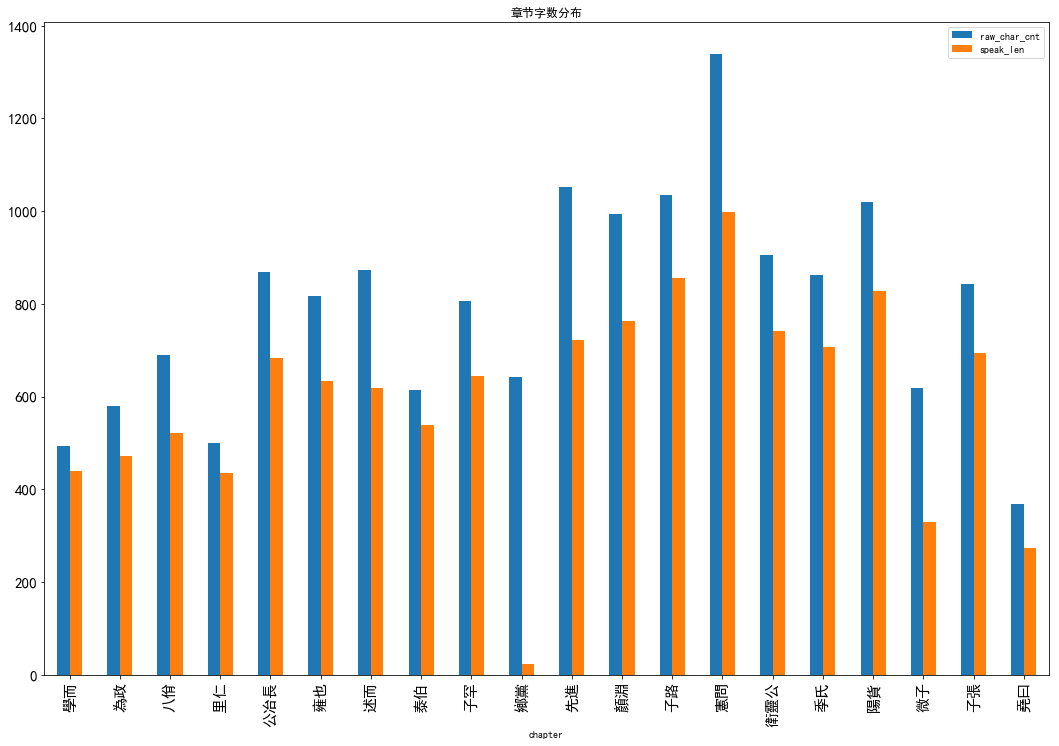

In [34]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
agg_fields = {'chapter_idx':'min', 'char_cnt':'sum', 'raw_char_cnt':'sum', 'sentences_cnt':'sum', 'speak_len':'sum'}
groupby = analects_df.groupby('chapter').agg(agg_fields).sort_values('chapter_idx')
groupby.plot.bar(figsize=[18, 12], y=['raw_char_cnt', 'speak_len'], fontsize=15, title="章节字数分布")

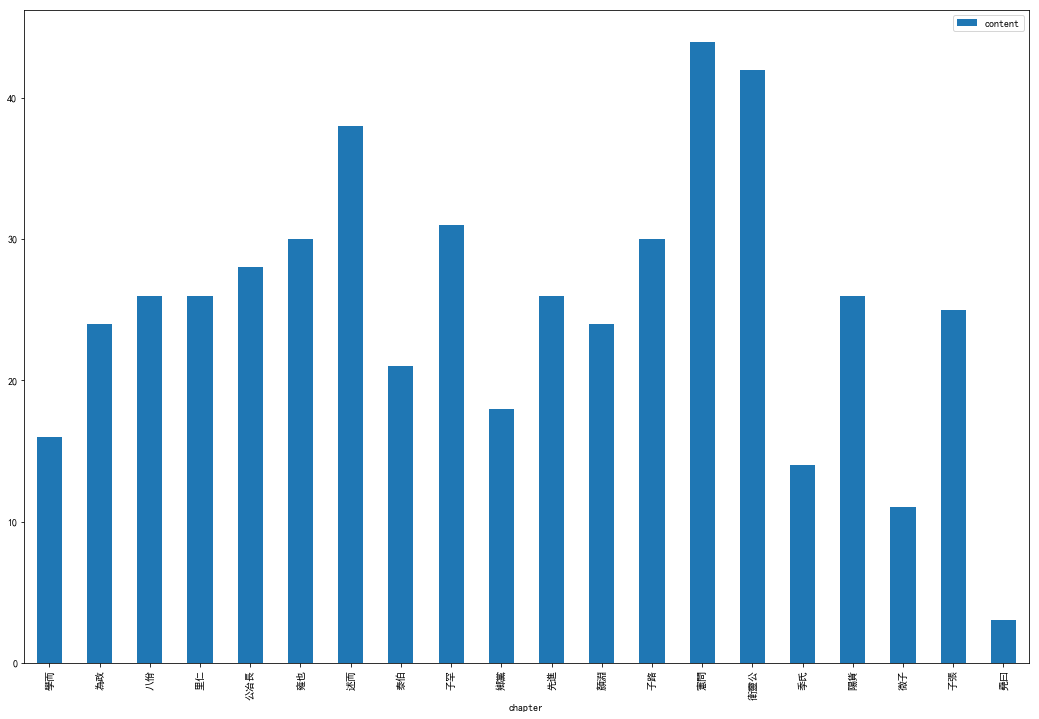

In [35]:
# 论语二十篇，每篇的章节数量统计
agg_fields = {'chapter_idx':'min', 'content':'count'}
groupby = analects_df.groupby('chapter').agg(agg_fields).sort_values('chapter_idx')
groupby.plot.bar(figsize=[18, 12], y=['content'])

In [36]:
#analects_df[analects_df['chapter'] == '子張']['content'].apply(show_raw_char)

In [37]:
analects_df

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
0,1,學而,1,子曰：「學而時習之，不亦說乎？有朋自遠方來，不亦樂乎？人不知而不慍，不亦君子乎？」,41,32,"[子曰, 學而時習之, 不亦說乎, 有朋自遠方來, 不亦樂乎, 人不知而不慍, 不亦君子乎]",7,1,30
1,1,學而,2,有子曰：「其為人也孝弟，而好犯上者，鮮矣；不好犯上，而好作亂者，未之有也。君子務本，本立而道...,61,48,"[有子曰, 其為人也孝弟, 而好犯上者, 鮮矣, 不好犯上, 而好作亂者, 未之有也, 君子...",11,1,45
2,1,學而,3,子曰：「巧言令色，鮮矣仁！」,14,9,"[子曰, 巧言令色, 鮮矣仁]",3,1,7
3,1,學而,4,曾子曰：「吾日三省吾身：為人謀而不忠乎？與朋友交而不信乎？傳不習乎？」,35,28,"[曾子曰, 吾日三省吾身, 為人謀而不忠乎, 與朋友交而不信乎, 傳不習乎]",5,1,25
4,1,學而,5,子曰：「道千乘之國：敬事而信，節用而愛人，使民以時。」,27,20,"[子曰, 道千乘之國, 敬事而信, 節用而愛人, 使民以時]",5,1,18
5,1,學而,6,子曰：「弟子入則孝，出則弟，謹而信，汎愛眾，而親仁。行有餘力，則以學文。」,37,27,"[子曰, 弟子入則孝, 出則弟, 謹而信, 汎愛眾, 而親仁, 行有餘力, 則以學文]",8,1,25
6,1,學而,7,子夏曰：「賢賢易色，事父母能竭其力，事君能致其身，與朋友交言而有信。雖曰未學，吾必謂之學矣。」,47,38,"[子夏曰, 賢賢易色, 事父母能竭其力, 事君能致其身, 與朋友交言而有信, 雖曰未學, 吾...",7,1,35
7,1,學而,8,子曰：「君子不重則不威，學則不固。主忠信，無友不如己者，過則勿憚改。」,35,27,"[子曰, 君子不重則不威, 學則不固, 主忠信, 無友不如己者, 過則勿憚改]",6,1,25
8,1,學而,9,曾子曰：「慎終追遠，民德歸厚矣。」,17,12,"[曾子曰, 慎終追遠, 民德歸厚矣]",3,1,9
9,1,學而,10,子禽問於子貢曰：「夫子至於是邦也，必聞其政，求之與？抑與之與？」子貢曰：「夫子溫、良、恭、儉...,70,53,"[子禽問於子貢曰, 夫子至於是邦也, 必聞其政, 求之與, 抑與之與, 子貢曰, 夫子溫良恭...",9,2,43


## 2. Word Frequency

In [38]:
from collections import Counter

In [39]:
counter = Counter()
for sentences in analects_df['sentences']:
    for s in sentences:
        counter.update(s)

In [40]:
len(counter)

1354

In [127]:
counter.most_common(40)

[('子', 973),
 ('曰', 757),
 ('之', 613),
 ('不', 583),
 ('也', 532),
 ('而', 343),
 ('其', 270),
 ('人', 219),
 ('者', 219),
 ('以', 211),
 ('有', 200),
 ('矣', 181),
 ('於', 175),
 ('為', 170),
 ('君', 160),
 ('乎', 158),
 ('可', 156),
 ('如', 154),
 ('與', 144),
 ('無', 131),
 ('言', 130),
 ('則', 124),
 ('問', 120),
 ('知', 118),
 ('何', 118),
 ('吾', 113),
 ('仁', 109),
 ('夫', 105),
 ('道', 89),
 ('焉', 88),
 ('行', 82),
 ('謂', 78),
 ('必', 75),
 ('禮', 75),
 ('孔', 74),
 ('斯', 71),
 ('三', 70),
 ('能', 69),
 ('見', 67),
 ('學', 65)]

In [42]:
print("我:{} 吾:{} 予:{}".format(counter['我'], counter['吾'], counter['予']))

我:53 吾:113 予:28


In [130]:
wowuyu_count = [('我',counter['我']),  ('吾', counter['吾']),  ('予',counter['予'])]
count_array = [[x[1] for x in wowuyu_count]]
count_column_names = [x[0] for x in wowuyu_count]
pd.DataFrame(count_array, columns=count_column_names, index=['统计值'])

,我,吾,予
统计值,53,113,28


In [137]:
show_content('宰我')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
60,3,八佾,21,哀公問社於宰我。宰我對曰：「夏后氏以松，殷人以柏，周人以栗，曰使民戰栗。」子聞之曰：「成事不...,59,45,"[哀公問社於宰我, 宰我對曰, 夏后氏以松, 殷人以柏, 周人以栗, 曰使民戰栗, 子聞之曰...",10,2,30
145,6,雍也,26,宰我問曰：「仁者，雖告之曰：『井有仁焉。』其從之也？」子曰：「何為其然也？君子可逝也，不可陷...,58,41,"[宰我問曰, 仁者, 雖告之曰, 井有仁焉, 其從之也, 子曰, 何為其然也, 君子可逝也,...",11,2,35
260,11,先進,3,德行：顏淵，閔子騫，冉伯牛，仲弓。言語：宰我，子貢。政事：冉有，季路。文學：子游，子夏。,44,30,"[德行, 顏淵, 閔子騫, 冉伯牛, 仲弓, 言語, 宰我, 子貢, 政事, 冉有, 季路,...",14,0,0
458,17,陽貨,21,宰我問：「三年之喪，期已久矣。君子三年不為禮，禮必壞；三年不為樂，樂必崩。舊穀既沒，新穀既升...,181,137,"[宰我問, 三年之喪, 期已久矣, 君子三年不為禮, 禮必壞, 三年不為樂, 樂必崩, 舊穀...",34,5,126


In [43]:
print("爾:{} 女:{} 汝:{}".format(counter['爾'], counter['女'], counter['汝']))

爾:29 女:19 汝:0


In [44]:
print("他:{} ".format(counter['他']))

他:5 


In [45]:
show_content('他')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
110,5,公冶長,19,子張問曰：「令尹子文三仕為令尹，無喜色；三已之，無慍色。舊令尹之政，必以告新令尹。何如？」子...,165,111,"[子張問曰, 令尹子文三仕為令尹, 無喜色, 三已之, 無慍色, 舊令尹之政, 必以告新令尹...",34,8,99
250,10,鄉黨,11,問人於他邦，再拜而送之。康子饋藥，拜而受之。曰：「丘未達，不敢嘗。」,34,25,"[問人於他邦, 再拜而送之, 康子饋藥, 拜而受之, 曰, 丘未達, 不敢嘗]",7,1,6
436,16,季氏,13,陳亢問於伯魚曰：「子亦有異聞乎？」對曰：「未也。嘗獨立，鯉趨而過庭。曰：『學詩乎？』對曰：『...,146,100,"[陳亢問於伯魚曰, 子亦有異聞乎, 對曰, 未也, 嘗獨立, 鯉趨而過庭, 曰, 學詩乎, ...",28,3,85
492,19,子張,18,曾子曰：「吾聞諸夫子：孟莊子之孝也，其他可能也；其不改父之臣，與父之政，是難能也。」,42,33,"[曾子曰, 吾聞諸夫子, 孟莊子之孝也, 其他可能也, 其不改父之臣, 與父之政, 是難能也]",7,1,30
498,19,子張,24,叔孫武叔毀仲尼。子貢曰：「無以為也，仲尼不可毀也。他人之賢者，丘陵也，猶可踰也；仲尼，日月也...,76,61,"[叔孫武叔毀仲尼, 子貢曰, 無以為也, 仲尼不可毀也, 他人之賢者, 丘陵也, 猶可踰也,...",13,1,51


In [46]:
show_content('予')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
47,3,八佾,8,子夏問曰：「『巧笑倩兮，美目盼兮，素以為絢兮。』何謂也？」子曰：「繪事後素。」曰：「禮後乎？...,66,44,"[子夏問曰, 巧笑倩兮, 美目盼兮, 素以為絢兮, 何謂也, 子曰, 繪事後素, 曰, 禮後...",12,4,35
101,5,公冶長,10,宰予晝寢。子曰：「朽木不可雕也，糞土之牆不可杇也，於予與何誅。」子曰：「始吾於人也，聽其言而...,71,56,"[宰予晝寢, 子曰, 朽木不可雕也, 糞土之牆不可杇也, 於予與何誅, 子曰, 始吾於人也,...",11,2,48
147,6,雍也,28,子見南子，子路不說。夫子矢之曰：「予所否者，天厭之！天厭之！」,31,23,"[子見南子, 子路不說, 夫子矢之曰, 予所否者, 天厭之, 天厭之]",6,1,10
172,7,述而,23,子曰：「天生德於予，桓魋其如予何？」,18,13,"[子曰, 天生德於予, 桓魋其如予何]",3,1,11
190,8,泰伯,3,曾子有疾，召門弟子曰：「啟予足！啟予手！《詩》云『戰戰兢兢，如臨深淵，如履薄冰。』而今而後，...,55,39,"[曾子有疾, 召門弟子曰, 啟予足, 啟予手, 詩云戰戰兢兢, 如臨深淵, 如履薄冰, 而今...",10,1,30
207,8,泰伯,20,舜有臣五人而天下治。武王曰：「予有亂臣十人。」孔子曰：「才難，不其然乎？唐虞之際，於斯為盛。...,83,65,"[舜有臣五人而天下治, 武王曰, 予有亂臣十人, 孔子曰, 才難, 不其然乎, 唐虞之際, ...",14,2,50
213,9,子罕,5,子畏於匡。曰：「文王既沒，文不在茲乎？天之將喪斯文也，後死者不得與於斯文也；天之未喪斯文也，...,54,44,"[子畏於匡, 曰, 文王既沒, 文不在茲乎, 天之將喪斯文也, 後死者不得與於斯文也, 天之...",8,1,39
220,9,子罕,12,子疾病，子路使門人為臣。病閒，曰：「久矣哉！由之行詐也，無臣而為有臣。吾誰欺？欺天乎？且予與...,81,66,"[子疾病, 子路使門人為臣, 病閒, 曰, 久矣哉, 由之行詐也, 無臣而為有臣, 吾誰欺,...",13,1,53
266,11,先進,9,顏淵死。子曰：「噫！天喪予！天喪予！」,19,12,"[顏淵死, 子曰, 噫, 天喪予, 天喪予]",5,1,7
268,11,先進,11,顏淵死，門人欲厚葬之，子曰：「不可。」門人厚葬之。子曰：「回也視予猶父也，予不得視猶子也。非...,56,42,"[顏淵死, 門人欲厚葬之, 子曰, 不可, 門人厚葬之, 子曰, 回也視予猶父也, 予不得視...",10,2,24


In [140]:
count_content('女')

15

In [141]:
counter['女']

19

In [47]:
show_content('女')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
32,2,為政,17,子曰：「由！誨女知之乎？知之為知之，不知為不知，是知也。」,29,21,"[子曰, 由, 誨女知之乎, 知之為知之, 不知為不知, 是知也]",6,1,19
45,3,八佾,6,季氏旅於泰山。子謂冉有曰：「女弗能救與？」對曰：「不能。」子曰：「嗚呼！曾謂泰山，不如林放乎？」,48,33,"[季氏旅於泰山, 子謂冉有曰, 女弗能救與, 對曰, 不能, 子曰, 嗚呼, 曾謂泰山, 不...",9,3,18
95,5,公冶長,4,子貢問曰：「賜也何如？」子曰：「女器也。」曰：「何器也？」曰：「瑚璉也。」,37,21,"[子貢問曰, 賜也何如, 子曰, 女器也, 曰, 何器也, 曰, 瑚璉也]",8,4,13
100,5,公冶長,9,子謂子貢曰：「女與回也孰愈？」對曰：「賜也何敢望回。回也聞一以知十，賜也聞一以知二。」子曰：...,59,44,"[子謂子貢曰, 女與回也孰愈, 對曰, 賜也何敢望回, 回也聞一以知十, 賜也聞一以知二, ...",9,3,35
131,6,雍也,12,冉求曰：「非不說子之道，力不足也。」子曰：「力不足者，中道而廢。今女畫。」,37,26,"[冉求曰, 非不說子之道, 力不足也, 子曰, 力不足者, 中道而廢, 今女畫]",7,2,21
132,6,雍也,13,子謂子夏曰：「女為君子儒，無為小人儒。」,20,15,"[子謂子夏曰, 女為君子儒, 無為小人儒]",3,1,10
133,6,雍也,14,子游為武城宰。子曰：「女得人焉爾乎？」曰：「有澹臺滅明者，行不由徑。非公事，未嘗至於偃之室也。」,48,36,"[子游為武城宰, 子曰, 女得人焉爾乎, 曰, 有澹臺滅明者, 行不由徑, 非公事, 未嘗至...",8,2,27
168,7,述而,19,葉公問孔子於子路，子路不對。子曰：「女奚不曰，其為人也，發憤忘食，樂以忘憂，不知老之將至云爾。」,48,38,"[葉公問孔子於子路, 子路不對, 子曰, 女奚不曰, 其為人也, 發憤忘食, 樂以忘憂, 不...",8,1,24
280,11,先進,23,子畏於匡，顏淵後。子曰：「吾以女為死矣。」曰：「子在，回何敢死？」,33,22,"[子畏於匡, 顏淵後, 子曰, 吾以女為死矣, 曰, 子在, 回何敢死]",7,2,12
384,15,衛靈公,3,子曰：「賜也，女以予為多學而識之者與？」對曰：「然，非與？」曰：「非也，予一以貫之。」,43,28,"[子曰, 賜也, 女以予為多學而識之者與, 對曰, 然, 非與, 曰, 非也, 予一以貫之]",9,3,23


In [48]:
show_content('說')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
0,1,學而,1,子曰：「學而時習之，不亦說乎？有朋自遠方來，不亦樂乎？人不知而不慍，不亦君子乎？」,41,32,"[子曰, 學而時習之, 不亦說乎, 有朋自遠方來, 不亦樂乎, 人不知而不慍, 不亦君子乎]",7,1,30
50,3,八佾,11,或問禘之說。子曰：「不知也。知其說者之於天下也，其如示諸斯乎！」指其掌。,36,28,"[或問禘之說, 子曰, 不知也, 知其說者之於天下也, 其如示諸斯乎, 指其掌]",6,1,18
60,3,八佾,21,哀公問社於宰我。宰我對曰：「夏后氏以松，殷人以柏，周人以栗，曰使民戰栗。」子聞之曰：「成事不...,59,45,"[哀公問社於宰我, 宰我對曰, 夏后氏以松, 殷人以柏, 周人以栗, 曰使民戰栗, 子聞之曰...",10,2,30
97,5,公冶長,6,子使漆雕開仕。對曰：「吾斯之未能信。」子說。,22,16,"[子使漆雕開仕, 對曰, 吾斯之未能信, 子說]",4,1,6
131,6,雍也,12,冉求曰：「非不說子之道，力不足也。」子曰：「力不足者，中道而廢。今女畫。」,37,26,"[冉求曰, 非不說子之道, 力不足也, 子曰, 力不足者, 中道而廢, 今女畫]",7,2,21
147,6,雍也,28,子見南子，子路不說。夫子矢之曰：「予所否者，天厭之！天厭之！」,31,23,"[子見南子, 子路不說, 夫子矢之曰, 予所否者, 天厭之, 天厭之]",6,1,10
232,9,子罕,24,子曰：「法語之言，能無從乎？改之為貴。巽與之言，能無說乎？繹之為貴。說而不繹，從而不改，吾末...,54,42,"[子曰, 法語之言, 能無從乎, 改之為貴, 巽與之言, 能無說乎, 繹之為貴, 說而不繹,...",10,1,40
261,11,先進,4,子曰：「回也非助我者也，於吾言無所不說。」,21,16,"[子曰, 回也非助我者也, 於吾言無所不說]",3,1,14
291,12,顏淵,8,棘子成曰：「君子質而已矣，何以文為？」子貢曰：「惜乎！夫子之說，君子也。駟不及舌。文猶質也，...,63,47,"[棘子成曰, 君子質而已矣, 何以文為, 子貢曰, 惜乎, 夫子之說, 君子也, 駟不及舌,...",12,2,40
323,13,子路,16,葉公問政。子曰：「近者說，遠者來。」,18,12,"[葉公問政, 子曰, 近者說, 遠者來]",4,1,6


In [49]:
show_content('悅')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len


In [154]:
show_content('子開')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len


In [158]:
country_list = ['衛',
'曹',
'宋',
'齊',
'鄭',
'陳',
'蔡',
'楚']
for c in country_list:
    print("{} ：{}".format(c, counter[c]))

衛 ：10
曹 ：0
宋 ：2
齊 ：26
鄭 ：3
陳 ：12
蔡 ：3
楚 ：2


In [161]:
#齊
analects_df.iloc[[163, 294, 466]]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
163,7,述而,14,子在齊聞韶，三月不知肉味。曰：「不圖為樂之至於斯也！」,27,21,"[子在齊聞韶, 三月不知肉味, 曰, 不圖為樂之至於斯也]",4,1,9
294,12,顏淵,11,齊景公問政於孔子。孔子對曰：「君君，臣臣，父父，子子。」公曰：「善哉！信如君不君，臣不臣，父...,64,46,"[齊景公問政於孔子, 孔子對曰, 君君, 臣臣, 父父, 子子, 公曰, 善哉, 信如君不君...",14,2,32
466,18,微子,3,齊景公待孔子，曰：「若季氏則吾不能，以季、孟之閒待之。」曰：「吾老矣，不能用也。」孔子行。,45,32,"[齊景公待孔子, 曰, 若季氏則吾不能, 以季孟之閒待之, 曰, 吾老矣, 不能用也, 孔子行]",8,2,21


In [165]:
#衛
analects_df.iloc[[164, 223, 310, 314, 315, 316, 376, 382, 496]]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
164,7,述而,15,冉有曰：「夫子為衛君乎？」子貢曰：「諾。吾將問之。」入，曰：「伯夷、叔齊何人也？」曰：「古之...,84,51,"[冉有曰, 夫子為衛君乎, 子貢曰, 諾, 吾將問之, 入, 曰, 伯夷叔齊何人也, 曰, ...",18,7,38
223,9,子罕,15,子曰：「吾自衛反魯，然後樂正，雅頌各得其所。」,23,17,"[子曰, 吾自衛反魯, 然後樂正, 雅頌各得其所]",4,1,15
310,13,子路,3,子路曰：「衛君待子而為政，子將奚先？」子曰：「必也正名乎！」子路曰：「有是哉，子之迂也！奚其...,154,119,"[子路曰, 衛君待子而為政, 子將奚先, 子曰, 必也正名乎, 子路曰, 有是哉, 子之迂也...",27,4,109
314,13,子路,7,子曰：「魯衛之政，兄弟也。」,14,9,"[子曰, 魯衛之政, 兄弟也]",3,1,7
315,13,子路,8,子謂衛公子荊，「善居室。始有，曰：『苟合矣。』少有，曰：『苟完矣。』富有，曰：『苟美矣。』」,46,27,"[子謂衛公子荊, 善居室, 始有, 曰, 苟合矣, 少有, 曰, 苟完矣, 富有, 曰, 苟美矣]",11,1,21
316,13,子路,9,子適衛，冉有僕。子曰：「庶矣哉！」冉有曰：「既庶矣。又何加焉？」曰：「富之。」曰：「既富矣，...,59,35,"[子適衛, 冉有僕, 子曰, 庶矣哉, 冉有曰, 既庶矣, 又何加焉, 曰, 富之, 曰, ...",14,5,21
376,14,憲問,39,子擊磬於衛。有荷蕢而過孔氏之門者，曰：「有心哉！擊磬乎！」既而曰：「鄙哉！硜硜乎！莫己知也，...,74,53,"[子擊磬於衛, 有荷蕢而過孔氏之門者, 曰, 有心哉, 擊磬乎, 既而曰, 鄙哉, 硜硜乎,...",15,3,32
382,15,衛靈公,1,衛靈公問陳於孔子。孔子對曰：「俎豆之事，則嘗聞之矣；軍旅之事，未之學也。」明日遂行。,42,33,"[衛靈公問陳於孔子, 孔子對曰, 俎豆之事, 則嘗聞之矣, 軍旅之事, 未之學也, 明日遂行]",7,1,17
496,19,子張,22,衛公孫朝問於子貢曰：「仲尼焉學？」子貢曰：「文武之道，未墜於地，在人。賢者識其大者，不賢者識...,74,59,"[衛公孫朝問於子貢曰, 仲尼焉學, 子貢曰, 文武之道, 未墜於地, 在人, 賢者識其大者,...",11,2,47


In [167]:
show_content('陳').index

Int64Index([110, 113, 180, 259, 358, 382, 383, 424, 436, 499], dtype='int64')

In [168]:
#陳
show_content('陳').index
analects_df.iloc[[113, 180, 259, 383]]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
113,5,公冶長,22,子在陳曰：「歸與！歸與！吾黨之小子狂簡，斐然成章，不知所以裁之。」,33,25,"[子在陳曰, 歸與, 歸與, 吾黨之小子狂簡, 斐然成章, 不知所以裁之]",6,1,21
180,7,述而,31,陳司敗問昭公知禮乎？孔子曰：「知禮。」孔子退，揖巫馬期而進之，曰：「吾聞君子不黨，君子亦黨乎...,96,73,"[陳司敗問昭公知禮乎, 孔子曰, 知禮, 孔子退, 揖巫馬期而進之, 曰, 吾聞君子不黨, ...",17,3,43
259,11,先進,2,子曰：「從我於陳、蔡者，皆不及門也。」,19,13,"[子曰, 從我於陳蔡者, 皆不及門也]",3,1,11
383,15,衛靈公,2,在陳絕糧，從者病，莫能興。子路慍見曰：「君子亦有窮乎？」子曰：「君子固窮，小人窮斯濫矣。」,45,33,"[在陳絕糧, 從者病, 莫能興, 子路慍見曰, 君子亦有窮乎, 子曰, 君子固窮, 小人窮斯濫矣]",8,2,16


In [178]:
analects_df.iloc[[468]]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
468,18,微子,5,楚狂接輿歌而過孔子曰：「鳳兮！鳳兮！何德之衰？往者不可諫，來者猶可追。已而，已而！今之從政者...,70,55,"[楚狂接輿歌而過孔子曰, 鳳兮, 鳳兮, 何德之衰, 往者不可諫, 來者猶可追, 已而, 已...",13,1,29


In [172]:
show_content('楚')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
468,18,微子,5,楚狂接輿歌而過孔子曰：「鳳兮！鳳兮！何德之衰？往者不可諫，來者猶可追。已而，已而！今之從政者...,70,55,"[楚狂接輿歌而過孔子曰, 鳳兮, 鳳兮, 何德之衰, 往者不可諫, 來者猶可追, 已而, 已...",13,1,29
472,18,微子,9,大師摯適齊，亞飯干適楚，三飯繚適蔡，四飯缺適秦。鼓方叔入於河，播鼗武入於漢，少師陽、擊磬襄，...,50,41,"[大師摯適齊, 亞飯干適楚, 三飯繚適蔡, 四飯缺適秦, 鼓方叔入於河, 播鼗武入於漢, 少...",8,0,0


In [51]:
show_content('秦')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
472,18,微子,9,大師摯適齊，亞飯干適楚，三飯繚適蔡，四飯缺適秦。鼓方叔入於河，播鼗武入於漢，少師陽、擊磬襄，...,50,41,"[大師摯適齊, 亞飯干適楚, 三飯繚適蔡, 四飯缺適秦, 鼓方叔入於河, 播鼗武入於漢, 少...",8,0,0


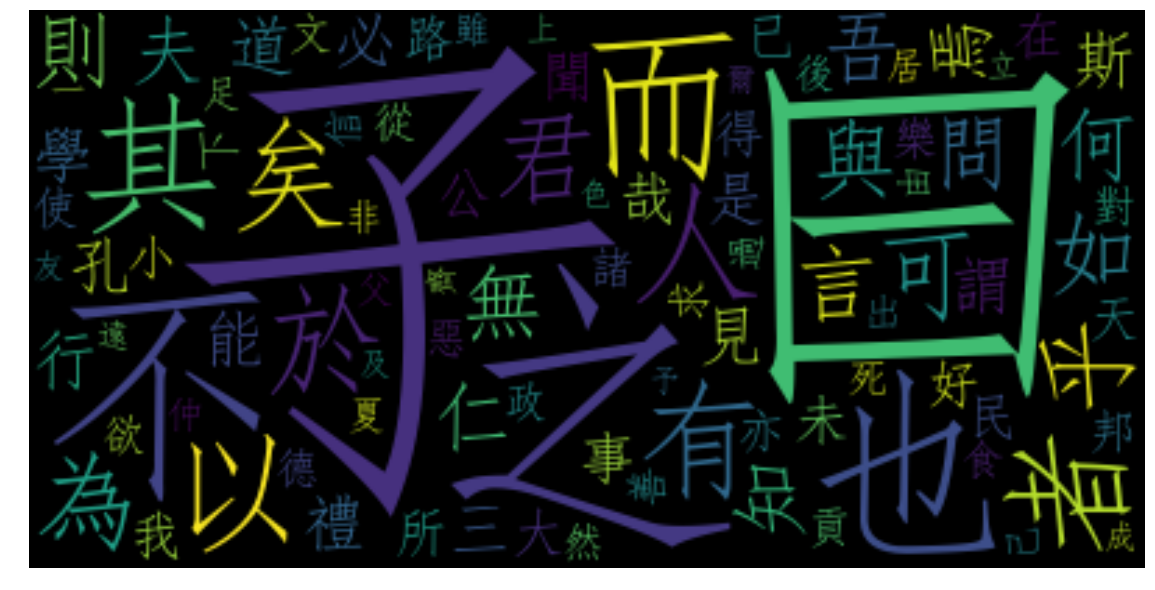

In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font = r'C:\Windows\Fonts\simfang.ttf'
freq = dict(counter.most_common(100))

# Generate a word cloud image
wordcloud = WordCloud(font_path=font).generate_from_frequencies(freq)
plt.figure(figsize=[20, 18])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
analects_df[analects_df['content'].apply(lambda data : '仁者' in data)]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
67,4,里仁,2,子曰：「不仁者不可以久處約，不可以長處樂。仁者安仁，知者利仁。」,32,25,"[子曰, 不仁者不可以久處約, 不可以長處樂, 仁者安仁, 知者利仁]",5,1,23
68,4,里仁,3,子曰：「唯仁者能好人，能惡人。」,16,11,"[子曰, 唯仁者能好人, 能惡人]",3,1,9
71,4,里仁,6,子曰：「我未見好仁者，惡不仁者。好仁者，無以尚之；惡不仁者，其為仁矣，不使不仁者加乎其身。有...,77,63,"[子曰, 我未見好仁者, 惡不仁者, 好仁者, 無以尚之, 惡不仁者, 其為仁矣, 不使不仁...",12,1,61
141,6,雍也,22,樊遲問知。子曰：「務民之義，敬鬼神而遠之，可謂知矣。」問仁。曰：「仁者先難而後獲，可謂仁矣。」,47,34,"[樊遲問知, 子曰, 務民之義, 敬鬼神而遠之, 可謂知矣, 問仁, 曰, 仁者先難而後獲,...",9,2,25
142,6,雍也,23,子曰：「知者樂水，仁者樂山；知者動，仁者靜；知者樂，仁者壽。」,31,22,"[子曰, 知者樂水, 仁者樂山, 知者動, 仁者靜, 知者樂, 仁者壽]",7,1,20
145,6,雍也,26,宰我問曰：「仁者，雖告之曰：『井有仁焉。』其從之也？」子曰：「何為其然也？君子可逝也，不可陷...,58,41,"[宰我問曰, 仁者, 雖告之曰, 井有仁焉, 其從之也, 子曰, 何為其然也, 君子可逝也,...",11,2,35
149,6,雍也,30,子貢曰：「如有博施於民而能濟眾，何如？可謂仁乎？」子曰：「何事於仁，必也聖乎！堯舜其猶病諸！...,78,61,"[子貢曰, 如有博施於民而能濟眾, 何如, 可謂仁乎, 子曰, 何事於仁, 必也聖乎, 堯舜...",13,2,56
237,9,子罕,29,子曰：「知者不惑，仁者不憂，勇者不懼。」,20,14,"[子曰, 知者不惑, 仁者不憂, 勇者不懼]",4,1,12
286,12,顏淵,3,司馬牛問仁。子曰：「仁者其言也訒。」曰：「其言也訒，斯謂之仁已乎？」子曰：「為之難，言之得無...,50,35,"[司馬牛問仁, 子曰, 仁者其言也訒, 曰, 其言也訒, 斯謂之仁已乎, 子曰, 為之難, ...",9,3,25
305,12,顏淵,22,樊遲問仁。子曰：「愛人。」問知。子曰：「知人。」樊遲未達。子曰：「舉直錯諸枉，能使枉者直。」...,139,99,"[樊遲問仁, 子曰, 愛人, 問知, 子曰, 知人, 樊遲未達, 子曰, 舉直錯諸枉, 能使...",28,5,73


#### (1) Names Collection

* bigram/tri-gram to count
* rules to partition
* customized dictionary

In [54]:
BI_GRAM_DICT = Counter()
TRI_GRAM_DICT = Counter()
FOUR_GRAM_DICT = Counter()
def gen_ngram(data):
    '''use sentences field to generate'''
    for s in data:
        num = len(s)
        if num < 2:
            continue
        for idx in range(num):
            if idx + 1 < num:
                bigram = s[idx : idx + 2]
                BI_GRAM_DICT[bigram] += 1
            if idx + 2 < num:
                trigram = s[idx : idx + 3]
                TRI_GRAM_DICT[trigram] += 1
            if idx + 3 < num:
                fourgram = s[idx : idx + 4]
                FOUR_GRAM_DICT[fourgram] += 1


In [55]:
none = analects_df.sentences.apply(gen_ngram)

In [56]:
def show_counter(counter):
    freq = dict(counter)
    wordcloud = WordCloud(font_path=font).generate_from_frequencies(freq)
    plt.figure(figsize=[18, 16])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [57]:
BI_GRAM_DICT.most_common(100)

[('子曰', 452),
 ('君子', 108),
 ('而不', 70),
 ('孔子', 68),
 ('子路', 47),
 ('子貢', 44),
 ('不可', 42),
 ('夫子', 39),
 ('對曰', 36),
 ('可以', 33),
 ('如也', 33),
 ('子之', 32),
 ('人之', 29),
 ('以為', 29),
 ('不知', 28),
 ('貢曰', 28),
 ('已矣', 26),
 ('小人', 24),
 ('仁者', 24),
 ('子夏', 23),
 ('子張', 23),
 ('天下', 23),
 ('人也', 22),
 ('可謂', 22),
 ('何如', 22),
 ('之不', 22),
 ('而無', 21),
 ('不能', 20),
 ('知也', 19),
 ('為之', 19),
 ('曾子', 17),
 ('子不', 17),
 ('謂之', 16),
 ('好學', 16),
 ('也已', 16),
 ('如之', 16),
 ('之何', 16),
 ('由也', 16),
 ('之言', 16),
 ('人不', 15),
 ('不以', 15),
 ('者也', 15),
 ('之以', 15),
 ('顏淵', 15),
 ('夏曰', 14),
 ('不如', 14),
 ('與之', 14),
 ('三年', 14),
 ('之道', 14),
 ('以禮', 14),
 ('有道', 14),
 ('其言', 14),
 ('問曰', 14),
 ('子謂', 14),
 ('不足', 14),
 ('吾不', 14),
 ('不得', 14),
 ('而已', 14),
 ('之者', 14),
 ('大夫', 14),
 ('也與', 14),
 ('言而', 13),
 ('問於', 13),
 ('聞之', 13),
 ('必有', 13),
 ('可與', 12),
 ('而後', 12),
 ('知之', 12),
 ('則民', 12),
 ('三子', 12),
 ('無道', 12),
 ('者不', 12),
 ('路曰', 12),
 ('不亦', 11),
 ('賜也', 11),
 ('之曰', 11),
 ('回也', 11

In [138]:
BI_GRAM_DICT['宰我']

6

In [139]:
show_content('我')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
20,2,為政,5,孟懿子問孝。子曰：「無違。」樊遲御，子告之曰：「孟孫問孝於我，我對曰『無違』。」樊遲曰：「何...,72,49,"[孟懿子問孝, 子曰, 無違, 樊遲御, 子告之曰, 孟孫問孝於我, 我對曰無違, 樊遲曰,...",13,4,30
56,3,八佾,17,子貢欲去告朔之餼羊。子曰：「賜也，爾愛其羊，我愛其禮。」,28,21,"[子貢欲去告朔之餼羊, 子曰, 賜也, 爾愛其羊, 我愛其禮]",5,1,10
60,3,八佾,21,哀公問社於宰我。宰我對曰：「夏后氏以松，殷人以柏，周人以栗，曰使民戰栗。」子聞之曰：「成事不...,59,45,"[哀公問社於宰我, 宰我對曰, 夏后氏以松, 殷人以柏, 周人以栗, 曰使民戰栗, 子聞之曰...",10,2,30
71,4,里仁,6,子曰：「我未見好仁者，惡不仁者。好仁者，無以尚之；惡不仁者，其為仁矣，不使不仁者加乎其身。有...,77,63,"[子曰, 我未見好仁者, 惡不仁者, 好仁者, 無以尚之, 惡不仁者, 其為仁矣, 不使不仁...",12,1,61
98,5,公冶長,7,子曰：「道不行，乘桴浮于海。從我者其由與？」子路聞之喜。子曰：「由也好勇過我，無所取材。」,45,33,"[子曰, 道不行, 乘桴浮于海, 從我者其由與, 子路聞之喜, 子曰, 由也好勇過我, 無所取材]",8,2,24
103,5,公冶長,12,子貢曰：「我不欲人之加諸我也，吾亦欲無加諸人。」子曰：「賜也，非爾所及也。」,38,28,"[子貢曰, 我不欲人之加諸我也, 吾亦欲無加諸人, 子曰, 賜也, 非爾所及也]",6,2,23
128,6,雍也,9,季氏使閔子騫為費宰。閔子騫曰：「善為我辭焉。如有復我者，則吾必在汶上矣。」,37,30,"[季氏使閔子騫為費宰, 閔子騫曰, 善為我辭焉, 如有復我者, 則吾必在汶上矣]",5,1,17
145,6,雍也,26,宰我問曰：「仁者，雖告之曰：『井有仁焉。』其從之也？」子曰：「何為其然也？君子可逝也，不可陷...,58,41,"[宰我問曰, 仁者, 雖告之曰, 井有仁焉, 其從之也, 子曰, 何為其然也, 君子可逝也,...",11,2,35
150,7,述而,1,子曰：「述而不作，信而好古，竊比於我老彭。」,22,16,"[子曰, 述而不作, 信而好古, 竊比於我老彭]",4,1,14
151,7,述而,2,子曰：「默而識之，學而不厭，誨人不倦，何有於我哉？」,26,19,"[子曰, 默而識之, 學而不厭, 誨人不倦, 何有於我哉]",5,1,17


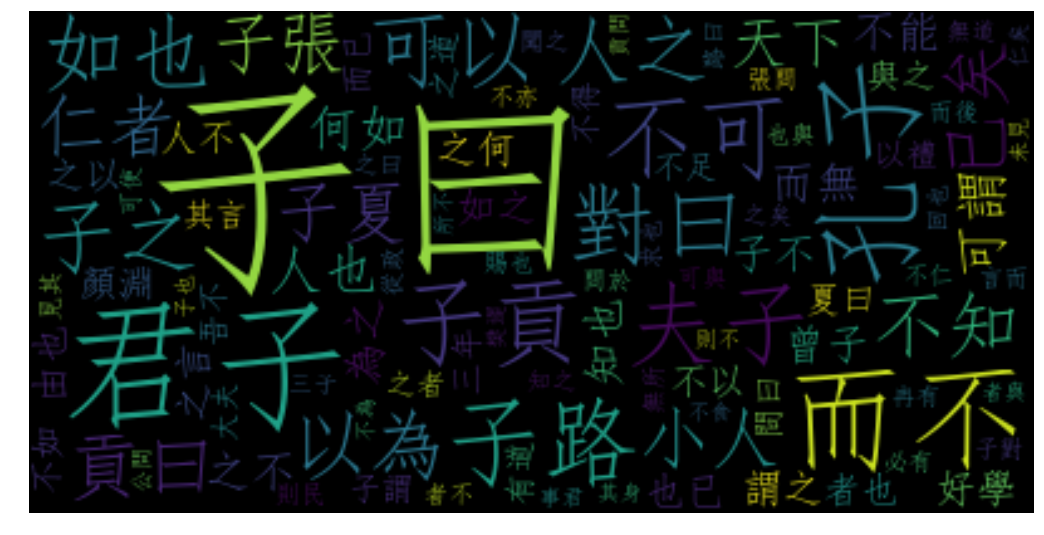

In [58]:
show_counter(BI_GRAM_DICT.most_common(100))

In [59]:
TRI_GRAM_DICT.most_common(100)

[('孔子曰', 32),
 ('子貢曰', 28),
 ('如之何', 16),
 ('子夏曰', 14),
 ('曾子曰', 13),
 ('子路曰', 12),
 ('孔子對', 11),
 ('子對曰', 11),
 ('子張問', 11),
 ('君子不', 10),
 ('子貢問', 10),
 ('君子之', 10),
 ('而已矣', 10),
 ('於孔子', 10),
 ('夫子之', 9),
 ('可以為', 8),
 ('不可以', 8),
 ('也已矣', 8),
 ('子路問', 8),
 ('子張曰', 8),
 ('之以禮', 7),
 ('不仁者', 7),
 ('邦有道', 7),
 ('邦無道', 7),
 ('亦可以', 7),
 ('聞斯行', 7),
 ('何謂也', 6),
 ('在其中', 6),
 ('其中矣', 6),
 ('季康子', 6),
 ('可知也', 6),
 ('子聞之', 6),
 ('二三子', 6),
 ('天下有', 6),
 ('君子有', 6),
 ('不好學', 6),
 ('其蔽也', 6),
 ('康子問', 5),
 ('不知其', 5),
 ('冉有曰', 5),
 ('子之道', 5),
 ('貢問曰', 5),
 ('伯夷叔', 5),
 ('夷叔齊', 5),
 ('閔子騫', 5),
 ('三子者', 5),
 ('而無禮', 5),
 ('下有道', 5),
 ('與之言', 5),
 ('之何其', 5),
 ('一言而', 5),
 ('可與言', 4),
 ('哀公問', 4),
 ('人而不', 4),
 ('而不仁', 4),
 ('不知也', 4),
 ('聞之曰', 4),
 ('天下之', 4),
 ('為仁矣', 4),
 ('子游曰', 4),
 ('子謂子', 4),
 ('君子哉', 4),
 ('知其仁', 4),
 ('其言而', 4),
 ('吾未見', 4),
 ('可及也', 4),
 ('顏淵曰', 4),
 ('於從政', 4),
 ('從政乎', 4),
 ('政乎何', 4),
 ('乎何有', 4),
 ('知之者', 4),
 ('可謂仁', 4),
 ('不為也', 4),
 ('而不與', 4),
 ('無禮則', 4)

In [60]:
FOUR_GRAM_DICT.most_common(100)

[('孔子對曰', 11),
 ('在其中矣', 6),
 ('季康子問', 5),
 ('子貢問曰', 5),
 ('伯夷叔齊', 5),
 ('天下有道', 5),
 ('如之何其', 5),
 ('不知其仁', 4),
 ('於從政乎', 4),
 ('從政乎何', 4),
 ('政乎何有', 4),
 ('而無禮則', 4),
 ('聞斯行諸', 4),
 ('於孔子曰', 4),
 ('何如斯可', 4),
 ('君子有三', 4),
 ('聞諸夫子', 4),
 ('巧言令色', 3),
 ('千乘之國', 3),
 ('問於子貢', 3),
 ('於子貢曰', 3),
 ('人之不己', 3),
 ('之不己知', 3),
 ('舉直錯諸', 3),
 ('直錯諸枉', 3),
 ('謂孔子曰', 3),
 ('人而不仁', 3),
 ('子聞之曰', 3),
 ('知其仁也', 3),
 ('君子之道', 3),
 ('可使從政', 3),
 ('使從政也', 3),
 ('從政也與', 3),
 ('而知之者', 3),
 ('威而不猛', 3),
 ('者有矣夫', 3),
 ('鞠躬如也', 3),
 ('亦各言其', 3),
 ('以吾從大', 3),
 ('吾從大夫', 3),
 ('從大夫之', 3),
 ('大夫之後', 3),
 ('聞斯行之', 3),
 ('問政於孔', 3),
 ('政於孔子', 3),
 ('問於孔子', 3),
 ('如斯可謂', 3),
 ('斯可謂之', 3),
 ('則民莫敢', 3),
 ('民莫敢不', 3),
 ('亦可以為', 3),
 ('泰而不驕', 3),
 ('人不厭其', 3),
 ('脩己以安', 3),
 ('世希不失', 3),
 ('希不失矣', 3),
 ('惠而不費', 3),
 ('其為人也', 2),
 ('與朋友交', 2),
 ('友不如己', 2),
 ('不如己者', 2),
 ('過則勿憚', 2),
 ('則勿憚改', 2),
 ('三年無改', 2),
 ('年無改於', 2),
 ('無改於父', 2),
 ('改於父之', 2),
 ('於父之道', 2),
 ('可謂孝矣', 2),
 ('可謂好學', 2),
 ('謂好學也', 2),
 ('好學

#### TODO:query traditional chinese dictionary to get word

### 3.Dialog statistics

### （1） 孔子独语的条目

In [61]:
#PUNC_REGEX = r'：|，|。|？|《|》|；|！|、'
def is_kongzi_alone(data):
    kongzi_alone_pattern = re.compile(r"^(孔?子曰：「[^「」]*」)$")
    return kongzi_alone_pattern.match(data) is not None

In [62]:
analects_df[analects_df.content.apply(is_kongzi_alone)]\
.groupby('chapter').agg({'chapter_idx':'min', 'content':'count', 'raw_char_cnt':'sum'}).sort_values('chapter_idx')

,chapter_idx,content,raw_char_cnt
chapter,,,
學而,1,8,184
為政,2,14,265
八佾,3,10,178
里仁,4,24,451
公冶長,5,8,159
雍也,6,15,273
述而,7,19,368
泰伯,8,15,343
子罕,9,16,339


In [63]:
analects_df[analects_df.content.apply(is_kongzi_alone)].shape

(229, 10)

In [64]:
kongzi_count = analects_df[analects_df.content.apply(is_kongzi_alone)].shape[0]
total = analects_df.shape[0]
chars = analects_df[analects_df.content.apply(is_kongzi_alone)]['raw_char_cnt'].sum()
total_chars = analects_df.raw_char_cnt.sum()
print("孔子独语章节：{} 全书总章节：{} 占比:{:.2%}".format(kongzi_count, total, kongzi_count/total))
print("孔子独语总字数：{} 全书总字数:{} 占比:{:.2%}".format(chars, total_chars, chars/total_chars))

孔子独语章节：229 全书总章节：503 占比:45.53%
孔子独语总字数：4590 全书总字数:15920 占比:28.83%


In [65]:
agg_fields = {'content':'count', 'raw_char_cnt':'sum'}
def label_kong(x):
    if is_kongzi_alone(x):
        return u'孔子独语'
    return u'其它'
is_alone = analects_df.groupby(analects_df.content.apply(label_kong)).agg(agg_fields).sort_values('content')
is_alone

,content,raw_char_cnt
content,,
孔子独语,229,4590
其它,274,11330


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014EFDD1CE80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000014EFE32D710>], dtype=object)

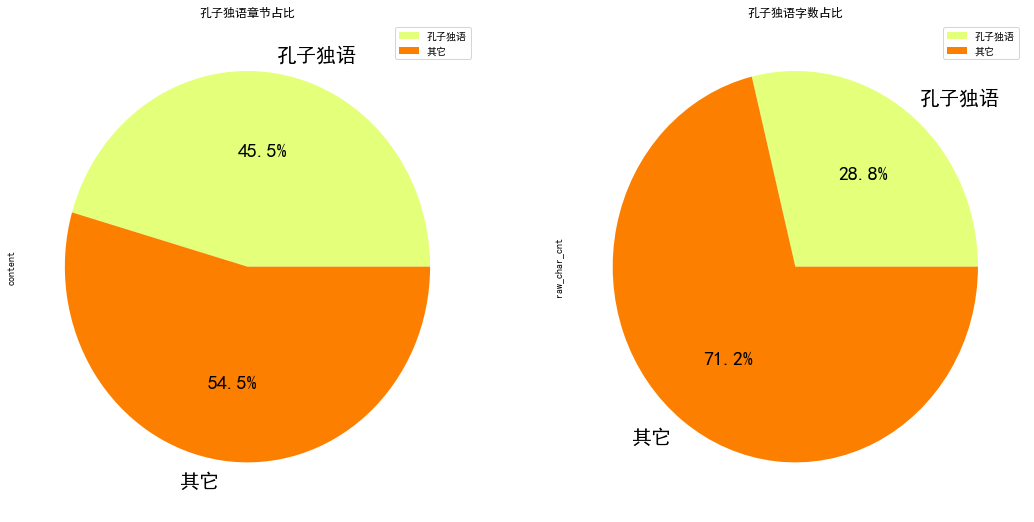

In [66]:
is_alone.plot.pie(figsize=[18, 9], 
                  subplots=True, colormap='Wistia', 
                  title=["孔子独语章节占比", "孔子独语字数占比"], 
                  fontsize=20,
                  labels=['孔子独语', '其它'],
                  autopct='%1.1f%%')

In [67]:
analects_df[analects_df.content.apply(is_kongzi_alone)][analects_df['chapter_idx'] == 15]

D:\Users\Emerson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
385,15,衛靈公,4,子曰：「由！知德者鮮矣。」,13,8,"[子曰, 由, 知德者鮮矣]",3,1,6
386,15,衛靈公,5,子曰：「無為而治者，其舜也與？夫何為哉，恭己正南面而已矣。」,30,23,"[子曰, 無為而治者, 其舜也與, 夫何為哉, 恭己正南面而已矣]",5,1,21
388,15,衛靈公,7,子曰：「直哉史魚！邦有道，如矢；邦無道，如矢。君子哉蘧伯玉！邦有道，則仕；邦無道，則可卷而懷之。」,49,36,"[子曰, 直哉史魚, 邦有道, 如矢, 邦無道, 如矢, 君子哉蘧伯玉, 邦有道, 則仕, ...",11,1,34
389,15,衛靈公,8,子曰：「可與言而不與之言，失人；不可與言而與之言，失言。知者不失人，亦不失言。」,40,31,"[子曰, 可與言而不與之言, 失人, 不可與言而與之言, 失言, 知者不失人, 亦不失言]",7,1,29
390,15,衛靈公,9,子曰：「志士仁人，無求生以害仁，有殺身以成仁。」,24,18,"[子曰, 志士仁人, 無求生以害仁, 有殺身以成仁]",4,1,16
393,15,衛靈公,12,子曰：「人無遠慮，必有近憂。」,15,10,"[子曰, 人無遠慮, 必有近憂]",3,1,8
394,15,衛靈公,13,子曰：「已矣乎！吾未見好德如好色者也。」,20,15,"[子曰, 已矣乎, 吾未見好德如好色者也]",3,1,13
395,15,衛靈公,14,子曰：「臧文仲其竊位者與？知柳下惠之賢，而不與立也。」,27,21,"[子曰, 臧文仲其竊位者與, 知柳下惠之賢, 而不與立也]",4,1,19
396,15,衛靈公,15,子曰：「躬自厚而薄責於人，則遠怨矣。」,19,14,"[子曰, 躬自厚而薄責於人, 則遠怨矣]",3,1,12
397,15,衛靈公,16,子曰：「不曰『如之何如之何』者，吾末如之何也已矣。」,26,19,"[子曰, 不曰如之何如之何者, 吾末如之何也已矣]",3,1,17


### （2） 单人独语的情况

In [68]:
def is_single(data):
    m = re.match(r"^(([^：「，。」『』？《》；！、]+)曰：「[^「」]*」)$", data)
    if m:
        if '謂' in m.group(2):
            return False
        return True
    return False

In [69]:
analects_df[analects_df.content.apply(is_single)].content.count()

262

In [70]:
person_counter = Counter()
def show_single(data):
    m = re.match(r"^(([^：「，。」『』？《》；！、]+)曰：「[^「」]*」)$", data)
    if m:
        person = m.group(2)
        if '謂' in person:
            return
        if '在' in person:
            person = re.sub(r'^(.*?)在.*?$', r'\1', person)
            print("replacing person:{} to {}".format(m.group(2), person))
        if person not in ['子', '孔子']:
            print("matching:{} person:{}".format(m.group(1), person))
        person_counter[person] += 1

In [71]:
none = analects_df.content.apply(show_single)

matching:有子曰：「其為人也孝弟，而好犯上者，鮮矣；不好犯上，而好作亂者，未之有也。君子務本，本立而道生。孝弟也者，其為仁之本與！」 person:有子
matching:曾子曰：「吾日三省吾身：為人謀而不忠乎？與朋友交而不信乎？傳不習乎？」 person:曾子
matching:子夏曰：「賢賢易色，事父母能竭其力，事君能致其身，與朋友交言而有信。雖曰未學，吾必謂之學矣。」 person:子夏
matching:曾子曰：「慎終追遠，民德歸厚矣。」 person:曾子
matching:有子曰：「禮之用，和為貴。先王之道斯為美，小大由之。有所不行，知和而和，不以禮節之，亦不可行也。」 person:有子
matching:有子曰：「信近於義，言可復也；恭近於禮，遠恥辱也；因不失其親，亦可宗也。」 person:有子
matching:子游曰：「事君數，斯辱矣，朋友數，斯疏矣。」 person:子游
matching:子貢曰：「夫子之文章，可得而聞也；夫子之言性與天道，不可得而聞也。」 person:子貢
replacing person:子在陳 to 子
matching:曾子曰：「以能問於不能，以多問於寡；有若無，實若虛，犯而不校，昔者吾友嘗從事於斯矣。」 person:曾子
matching:曾子曰：「可以託六尺之孤，可以寄百里之命，臨大節而不可奪也。君子人與？君子人也。」 person:曾子
matching:曾子曰：「士不可以不弘毅，任重而道遠。仁以為己任，不亦重乎？死而後已，不亦遠乎？」 person:曾子
matching:牢曰：「子云，『吾不試，故藝』。」 person:牢
matching:顏淵喟然歎曰：「仰之彌高，鑽之彌堅；瞻之在前，忽焉在後。夫子循循然善誘人，博我以文，約我以禮。欲罷不能，既竭吾才，如有所立卓爾。雖欲從之，末由也已。」 person:顏淵喟然歎
matching:曾子曰：「君子以文會友，以友輔仁。」 person:曾子
matching:子張曰：「士見危致命，見得思義，祭思敬，喪思哀，其可已矣。」 person:子張
matching:子張曰：「執德不弘，信道不篤，焉能為有？焉能為亡？」 person:子張
matching:子夏曰：「雖小道，必有可觀者焉；致遠恐泥，是以君子不為也。」 person:子夏
matching:

In [72]:
person_counter.most_common()

[('子', 220),
 ('子夏', 10),
 ('孔子', 10),
 ('曾子', 9),
 ('有子', 3),
 ('子游', 3),
 ('子貢', 3),
 ('子張', 2),
 ('牢', 1),
 ('顏淵喟然歎', 1)]

In [73]:
person_counter = Counter()
def show_single(data):
    m = re.match(r"^(([^「」]+)曰：「[^「」]*」)$", data)
    if m:
        person = m.group(2)
        if '謂' in person:
            return
        if '在' in person:
            person = re.sub(r'^(.*?)在.*?$', r'\1', person)
            print("replacing person:{} to {}".format(m.group(2), person))
        if person not in ['子', '孔子']:
            print("matching:{} person:{}".format(m.group(1), person))
        person_counter[person] += 1

In [74]:
analects_df[analects_df.content.apply(lambda x: '左丘明' in x)]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
116,5,公冶長,25,子曰：「巧言、令色、足恭，左丘明恥之，丘亦恥之。匿怨而友其人，左丘明恥之，丘亦恥之。」,43,32,"[子曰, 巧言令色足恭, 左丘明恥之, 丘亦恥之, 匿怨而友其人, 左丘明恥之, 丘亦恥之]",7,1,30


In [75]:
analects_df[analects_df.content.apply(lambda x: '已矣乎' in x)]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
118,5,公冶長,27,子曰：「已矣乎！吾未見能見其過而內自訟者也。」,23,18,"[子曰, 已矣乎, 吾未見能見其過而內自訟者也]",3,1,16
394,15,衛靈公,13,子曰：「已矣乎！吾未見好德如好色者也。」,20,15,"[子曰, 已矣乎, 吾未見好德如好色者也]",3,1,13


### （4） 无语言记录

In [76]:
analects_df[analects_df.content.apply(lambda x : re.match(r'^[^「」]+$', x) is not None)]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
105,5,公冶長,14,子路有聞，未之能行，唯恐有聞。,15,12,"[子路有聞, 未之能行, 唯恐有聞]",3,0,0
153,7,述而,4,子之燕居，申申如也，夭夭如也。,15,12,"[子之燕居, 申申如也, 夭夭如也]",3,0,0
158,7,述而,9,子食於有喪者之側，未嘗飽也。,14,12,"[子食於有喪者之側, 未嘗飽也]",2,0,0
159,7,述而,10,子於是日哭，則不歌。,10,8,"[子於是日哭, 則不歌]",2,0,0
162,7,述而,13,子之所慎：齊，戰，疾。,11,7,"[子之所慎, 齊, 戰, 疾]",4,0,0
167,7,述而,18,子所雅言，詩、書、執禮，皆雅言也。,17,12,"[子所雅言, 詩書執禮, 皆雅言也]",3,0,0
170,7,述而,21,子不語怪，力，亂，神。,11,7,"[子不語怪, 力, 亂, 神]",4,0,0
174,7,述而,25,子以四教：文，行，忠，信。,13,8,"[子以四教, 文, 行, 忠, 信]",5,0,0
176,7,述而,27,子釣而不綱，弋不射宿。,11,9,"[子釣而不綱, 弋不射宿]",2,0,0
181,7,述而,32,子與人歌而善，必使反之，而後和之。,17,14,"[子與人歌而善, 必使反之, 而後和之]",3,0,0


In [77]:
analects_df[analects_df.content.apply(lambda x : re.match(r'^[^「」]+$', x) is not None)].content.count()

36

In [78]:
# average char number
analects_df[analects_df.content.apply(lambda x : re.match(r'^[^「」]+$', x) is not None)].raw_char_cnt.mean()

25.27777777777778

### （5）对话类型

In [79]:
analects_df[analects_df.content.apply(lambda x : re.match(r'^.*「.*」.*「.*」.*$', x) is not None) ]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
9,1,學而,10,子禽問於子貢曰：「夫子至於是邦也，必聞其政，求之與？抑與之與？」子貢曰：「夫子溫、良、恭、儉...,70,53,"[子禽問於子貢曰, 夫子至於是邦也, 必聞其政, 求之與, 抑與之與, 子貢曰, 夫子溫良恭...",9,2,43
14,1,學而,15,子貢曰：「貧而無諂，富而無驕，何如？」子曰：「可也。未若貧而樂，富而好禮者也。」子貢曰：「《...,93,64,"[子貢曰, 貧而無諂, 富而無驕, 何如, 子曰, 可也, 未若貧而樂, 富而好禮者也, 子...",17,4,54
20,2,為政,5,孟懿子問孝。子曰：「無違。」樊遲御，子告之曰：「孟孫問孝於我，我對曰『無違』。」樊遲曰：「何...,72,49,"[孟懿子問孝, 子曰, 無違, 樊遲御, 子告之曰, 孟孫問孝於我, 我對曰無違, 樊遲曰,...",13,4,30
34,2,為政,19,哀公問曰：「何為則民服？」孔子對曰：「舉直錯諸枉，則民服；舉枉錯諸直，則民不服。」,41,30,"[哀公問曰, 何為則民服, 孔子對曰, 舉直錯諸枉, 則民服, 舉枉錯諸直, 則民不服]",7,2,22
35,2,為政,20,季康子問：「使民敬、忠以勸，如之何？」子曰：「臨之以莊則敬，孝慈則忠，舉善而教不能，則勸。」,46,33,"[季康子問, 使民敬忠以勸, 如之何, 子曰, 臨之以莊則敬, 孝慈則忠, 舉善而教不能, 則勸]",8,2,27
36,2,為政,21,或謂孔子曰：「子奚不為政？」子曰：「《書》云：『孝乎惟孝、友于兄弟，施於有政。』是亦為政，奚...,52,35,"[或謂孔子曰, 子奚不為政, 子曰, 書云, 孝乎惟孝友于兄弟, 施於有政, 是亦為政, 奚...",8,2,28
38,2,為政,23,子張問：「十世可知也？」子曰：「殷因於夏禮，所損益，可知也；周因於殷禮，所損益，可知也；其或...,58,43,"[子張問, 十世可知也, 子曰, 殷因於夏禮, 所損益, 可知也, 周因於殷禮, 所損益, ...",11,2,38
45,3,八佾,6,季氏旅於泰山。子謂冉有曰：「女弗能救與？」對曰：「不能。」子曰：「嗚呼！曾謂泰山，不如林放乎？」,48,33,"[季氏旅於泰山, 子謂冉有曰, 女弗能救與, 對曰, 不能, 子曰, 嗚呼, 曾謂泰山, 不...",9,3,18
47,3,八佾,8,子夏問曰：「『巧笑倩兮，美目盼兮，素以為絢兮。』何謂也？」子曰：「繪事後素。」曰：「禮後乎？...,66,44,"[子夏問曰, 巧笑倩兮, 美目盼兮, 素以為絢兮, 何謂也, 子曰, 繪事後素, 曰, 禮後...",12,4,35
52,3,八佾,13,王孫賈問曰：「與其媚於奧，寧媚於竈，何謂也？」子曰：「不然，獲罪於天，無所禱也。」,41,29,"[王孫賈問曰, 與其媚於奧, 寧媚於竈, 何謂也, 子曰, 不然, 獲罪於天, 無所禱也]",8,2,22


In [80]:
analects_df[analects_df.content.apply(lambda x : re.match(r'^.*「.*」.*「.*」.*$', x) is not None)].raw_char_cnt.mean()

56.167883211678834

In [81]:
dialog_case = analects_df.content.apply(lambda x : re.match(r'^.*「.*」.*「.*」.*$', x) is None) 
no_word_case = analects_df.content.apply(lambda x : re.match(r'^[^「」]+$', x) is None)
single_case = analects_df.content.apply(is_single).apply(lambda x: not x)

In [82]:
analects_df[single_case & no_word_case & dialog_case]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
21,2,為政,6,孟武伯問孝。子曰：「父母唯其疾之憂。」,19,14,"[孟武伯問孝, 子曰, 父母唯其疾之憂]",3,1,7
22,2,為政,7,子游問孝。子曰：「今之孝者，是謂能養。至於犬馬，皆能有養；不敬，何以別乎？」,38,28,"[子游問孝, 子曰, 今之孝者, 是謂能養, 至於犬馬, 皆能有養, 不敬, 何以別乎]",8,1,22
23,2,為政,8,子夏問孝。子曰：「色難。有事弟子服其勞，有酒食先生饌，曾是以為孝乎？」,35,27,"[子夏問孝, 子曰, 色難, 有事弟子服其勞, 有酒食先生饌, 曾是以為孝乎]",6,1,21
28,2,為政,13,子貢問君子。子曰：「先行其言，而後從之。」,21,15,"[子貢問君子, 子曰, 先行其言, 而後從之]",4,1,8
33,2,為政,18,子張學干祿。子曰：「多聞闕疑，慎言其餘，則寡尤；多見闕殆，慎行其餘，則寡悔。言寡尤，行寡悔，...,53,40,"[子張學干祿, 子曰, 多聞闕疑, 慎言其餘, 則寡尤, 多見闕殆, 慎行其餘, 則寡悔, ...",11,1,33
40,3,八佾,1,孔子謂季氏：「八佾舞於庭，是可忍也，孰不可忍也？」,25,19,"[孔子謂季氏, 八佾舞於庭, 是可忍也, 孰不可忍也]",4,1,14
41,3,八佾,2,三家者以雍徹。子曰：「『相維辟公，天子穆穆』，奚取於三家之堂？」,32,23,"[三家者以雍徹, 子曰, 相維辟公, 天子穆穆, 奚取於三家之堂]",5,1,15
43,3,八佾,4,林放問禮之本。子曰：「大哉問！禮，與其奢也，寧儉；喪，與其易也，寧戚。」,36,25,"[林放問禮之本, 子曰, 大哉問, 禮, 與其奢也, 寧儉, 喪, 與其易也, 寧戚]",9,1,17
50,3,八佾,11,或問禘之說。子曰：「不知也。知其說者之於天下也，其如示諸斯乎！」指其掌。,36,28,"[或問禘之說, 子曰, 不知也, 知其說者之於天下也, 其如示諸斯乎, 指其掌]",6,1,18
51,3,八佾,12,祭如在，祭神如神在。子曰：「吾不與祭，如不祭。」,24,17,"[祭如在, 祭神如神在, 子曰, 吾不與祭, 如不祭]",5,1,7


### （6）问与答

In [83]:
analects_df[analects_df.content.apply(lambda x:re.match(r".*?問.*?子曰.*?", x) is not None)].content.count()

67

In [84]:
analects_df[analects_df.content.apply(lambda x:re.match(r".*?問.*?子曰.*?", x) is not None)]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
20,2,為政,5,孟懿子問孝。子曰：「無違。」樊遲御，子告之曰：「孟孫問孝於我，我對曰『無違』。」樊遲曰：「何...,72,49,"[孟懿子問孝, 子曰, 無違, 樊遲御, 子告之曰, 孟孫問孝於我, 我對曰無違, 樊遲曰,...",13,4,30
21,2,為政,6,孟武伯問孝。子曰：「父母唯其疾之憂。」,19,14,"[孟武伯問孝, 子曰, 父母唯其疾之憂]",3,1,7
22,2,為政,7,子游問孝。子曰：「今之孝者，是謂能養。至於犬馬，皆能有養；不敬，何以別乎？」,38,28,"[子游問孝, 子曰, 今之孝者, 是謂能養, 至於犬馬, 皆能有養, 不敬, 何以別乎]",8,1,22
23,2,為政,8,子夏問孝。子曰：「色難。有事弟子服其勞，有酒食先生饌，曾是以為孝乎？」,35,27,"[子夏問孝, 子曰, 色難, 有事弟子服其勞, 有酒食先生饌, 曾是以為孝乎]",6,1,21
28,2,為政,13,子貢問君子。子曰：「先行其言，而後從之。」,21,15,"[子貢問君子, 子曰, 先行其言, 而後從之]",4,1,8
35,2,為政,20,季康子問：「使民敬、忠以勸，如之何？」子曰：「臨之以莊則敬，孝慈則忠，舉善而教不能，則勸。」,46,33,"[季康子問, 使民敬忠以勸, 如之何, 子曰, 臨之以莊則敬, 孝慈則忠, 舉善而教不能, 則勸]",8,2,27
38,2,為政,23,子張問：「十世可知也？」子曰：「殷因於夏禮，所損益，可知也；周因於殷禮，所損益，可知也；其或...,58,43,"[子張問, 十世可知也, 子曰, 殷因於夏禮, 所損益, 可知也, 周因於殷禮, 所損益, ...",11,2,38
43,3,八佾,4,林放問禮之本。子曰：「大哉問！禮，與其奢也，寧儉；喪，與其易也，寧戚。」,36,25,"[林放問禮之本, 子曰, 大哉問, 禮, 與其奢也, 寧儉, 喪, 與其易也, 寧戚]",9,1,17
47,3,八佾,8,子夏問曰：「『巧笑倩兮，美目盼兮，素以為絢兮。』何謂也？」子曰：「繪事後素。」曰：「禮後乎？...,66,44,"[子夏問曰, 巧笑倩兮, 美目盼兮, 素以為絢兮, 何謂也, 子曰, 繪事後素, 曰, 禮後...",12,4,35
50,3,八佾,11,或問禘之說。子曰：「不知也。知其說者之於天下也，其如示諸斯乎！」指其掌。,36,28,"[或問禘之說, 子曰, 不知也, 知其說者之於天下也, 其如示諸斯乎, 指其掌]",6,1,18


In [85]:
analects_df[analects_df.content.apply(lambda x:re.match(r".*?問[^「」]+子曰.*?", x) is not None)].content.count()

43

In [86]:
analects_df[analects_df.content.apply(lambda x:re.match(r".*?問[^「」]+子曰.*?", x) is not None)]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
20,2,為政,5,孟懿子問孝。子曰：「無違。」樊遲御，子告之曰：「孟孫問孝於我，我對曰『無違』。」樊遲曰：「何...,72,49,"[孟懿子問孝, 子曰, 無違, 樊遲御, 子告之曰, 孟孫問孝於我, 我對曰無違, 樊遲曰,...",13,4,30
21,2,為政,6,孟武伯問孝。子曰：「父母唯其疾之憂。」,19,14,"[孟武伯問孝, 子曰, 父母唯其疾之憂]",3,1,7
22,2,為政,7,子游問孝。子曰：「今之孝者，是謂能養。至於犬馬，皆能有養；不敬，何以別乎？」,38,28,"[子游問孝, 子曰, 今之孝者, 是謂能養, 至於犬馬, 皆能有養, 不敬, 何以別乎]",8,1,22
23,2,為政,8,子夏問孝。子曰：「色難。有事弟子服其勞，有酒食先生饌，曾是以為孝乎？」,35,27,"[子夏問孝, 子曰, 色難, 有事弟子服其勞, 有酒食先生饌, 曾是以為孝乎]",6,1,21
28,2,為政,13,子貢問君子。子曰：「先行其言，而後從之。」,21,15,"[子貢問君子, 子曰, 先行其言, 而後從之]",4,1,8
43,3,八佾,4,林放問禮之本。子曰：「大哉問！禮，與其奢也，寧儉；喪，與其易也，寧戚。」,36,25,"[林放問禮之本, 子曰, 大哉問, 禮, 與其奢也, 寧儉, 喪, 與其易也, 寧戚]",9,1,17
50,3,八佾,11,或問禘之說。子曰：「不知也。知其說者之於天下也，其如示諸斯乎！」指其掌。,36,28,"[或問禘之說, 子曰, 不知也, 知其說者之於天下也, 其如示諸斯乎, 指其掌]",6,1,18
99,5,公冶長,8,孟武伯問：「子路仁乎？」子曰：「不知也。」又問。子曰：「由也，千乘之國，可使治其賦也，不知其...,123,86,"[孟武伯問, 子路仁乎, 子曰, 不知也, 又問, 子曰, 由也, 千乘之國, 可使治其賦也...",23,7,72
121,6,雍也,2,仲弓問子桑伯子，子曰：「可也簡。」仲弓曰：「居敬而行簡，以臨其民，不亦可乎？居簡而行簡，無乃...,61,44,"[仲弓問子桑伯子, 子曰, 可也簡, 仲弓曰, 居敬而行簡, 以臨其民, 不亦可乎, 居簡而...",11,3,30
141,6,雍也,22,樊遲問知。子曰：「務民之義，敬鬼神而遠之，可謂知矣。」問仁。曰：「仁者先難而後獲，可謂仁矣。」,47,34,"[樊遲問知, 子曰, 務民之義, 敬鬼神而遠之, 可謂知矣, 問仁, 曰, 仁者先難而後獲,...",9,2,25


In [87]:
analects_df[analects_df.speak_times == 0]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
105,5,公冶長,14,子路有聞，未之能行，唯恐有聞。,15,12,"[子路有聞, 未之能行, 唯恐有聞]",3,0,0
153,7,述而,4,子之燕居，申申如也，夭夭如也。,15,12,"[子之燕居, 申申如也, 夭夭如也]",3,0,0
158,7,述而,9,子食於有喪者之側，未嘗飽也。,14,12,"[子食於有喪者之側, 未嘗飽也]",2,0,0
159,7,述而,10,子於是日哭，則不歌。,10,8,"[子於是日哭, 則不歌]",2,0,0
162,7,述而,13,子之所慎：齊，戰，疾。,11,7,"[子之所慎, 齊, 戰, 疾]",4,0,0
167,7,述而,18,子所雅言，詩、書、執禮，皆雅言也。,17,12,"[子所雅言, 詩書執禮, 皆雅言也]",3,0,0
170,7,述而,21,子不語怪，力，亂，神。,11,7,"[子不語怪, 力, 亂, 神]",4,0,0
174,7,述而,25,子以四教：文，行，忠，信。,13,8,"[子以四教, 文, 行, 忠, 信]",5,0,0
176,7,述而,27,子釣而不綱，弋不射宿。,11,9,"[子釣而不綱, 弋不射宿]",2,0,0
181,7,述而,32,子與人歌而善，必使反之，而後和之。,17,14,"[子與人歌而善, 必使反之, 而後和之]",3,0,0


In [88]:
analects_df.speak_times.sum()

764

## 4.重复子句检查

In [89]:
dup_counter = Counter()
for char_num in reversed(range(5, 30)):
    sub_counter = Counter()
    def check_dup(sentences_list):
        if not sentences_list:
            return
        for sentence in sentences_list:
            if not sentence or len(sentence) < char_num:
                continue
            sub_char_total = len(sentence)
            for idx in range(sub_char_total):
                if idx + char_num > sub_char_total:
                    break
                prefix = sentence[idx : idx + char_num]
                sub_counter[prefix] += 1
    
    none = analects_df.sentences.apply(check_dup)
    
    def is_found(sub_sentence):
        for sentence in dup_counter.keys():
            if sub_sentence in sentence:
                return True
        return False
    
    for k, v in sub_counter.items():
        if v > 1:
            if not is_found(k):
                print("find {:-2} char:{}\ttimes:{}".format(char_num, k, v))
                dup_counter[k] = v

find 10 char:吾未見好德如好色者也	times:2
find  9 char:言不可以若是其幾也	times:2
find  8 char:三年無改於父之道	times:2
find  8 char:斯人也而有斯疾也	times:2
find  8 char:其可謂至德也已矣	times:2
find  8 char:吾末如之何也已矣	times:2
find  8 char:季康子問政於孔子	times:2
find  8 char:何如斯可謂之士矣	times:2
find  7 char:始可與言詩已矣	times:2
find  7 char:不患人之不己知	times:2
find  7 char:以其兄之子妻之	times:2
find  7 char:猶吾大夫崔子也	times:2
find  7 char:亦可以弗畔矣夫	times:2
find  7 char:擇其善者而從之	times:2
find  7 char:吾不得而見之矣	times:2
find  7 char:以吾從大夫之後	times:3
find  7 char:亦可以為成人矣	times:2
find  6 char:可謂好學也已	times:2
find  6 char:不以其道得之	times:2
find  6 char:能以禮讓為國	times:2
find  6 char:弟子孰為好學	times:2
find  6 char:有顏回者好學	times:2
find  6 char:不幸短命死矣	times:2
find  6 char:可使從政也與	times:3
find  6 char:於從政乎何有	times:4
find  6 char:君子博學於文	times:2
find  6 char:堯舜其猶病諸	times:2
find  6 char:也問聞斯行諸	times:2
find  6 char:亦各言其志也	times:2
find  6 char:必不得已而去	times:2
find  6 char:不幾乎一言而	times:2
find  6 char:善而莫之違也	times:2
find  6 char:桓公殺公子糾	times:2
find  6 char:子服景伯以告	times:2
find  6 char:脩己以安百姓	

In [90]:
dup_counter = Counter()
for char_num in reversed(range(10, 30)):
    sub_counter = Counter()
    def check_dup(sentence):
        if not sentence:
            return
        if not sentence or len(sentence) < char_num:
            return
        sub_char_total = len(sentence)
        for idx in range(sub_char_total):
            if idx + char_num > sub_char_total:
                break
            prefix = sentence[idx : idx + char_num]
            sub_counter[prefix] += 1
    
    none = analects_df.content.apply(check_dup)
    
    def is_found(sub_sentence):
        for sentence in dup_counter.keys():
            if sub_sentence in sentence:
                return True
        return False
    
    for k, v in sub_counter.items():
        if v > 1:
            if not is_found(k):
                print("find {:-2} char:{}\ttimes:{}".format(char_num, k, v))
                dup_counter[k] = v

find 28 char:邦，有諸？」孔子對曰：「言不可以若是其幾也。人之言曰：『	times:2
find 25 char:問：「弟子孰為好學？」孔子對曰：「有顏回者好學，不	times:2
find 25 char:子曰：「君子博學於文，約之以禮，亦可以弗畔矣夫！」	times:2
find 19 char:孔子曰：「以吾從大夫之後，不敢不告也。	times:2
find 19 char:。」曰：「如斯而已乎？」曰：「脩己以安	times:2
find 18 char:問曰：「何如斯可謂之士矣？」子曰：「	times:2
find 16 char:矣。」曰：「仁矣乎？」曰：「未知	times:2
find 16 char:。」子貢曰：「必不得已而去，於斯	times:2
find 15 char:三年無改於父之道，可謂孝矣。」	times:2
find 15 char:曰：『猶吾大夫崔子也。』違之。	times:2
find 15 char:子曰：「不在其位，不謀其政。」	times:2
find 14 char:。」曰：「敢問其次。」曰：「	times:2
find 14 char:之，何如？」子曰：「未可也。	times:2
find 14 char:乎？』對曰：『未也。』『不學	times:2
find 13 char:友不如己者，過則勿憚改。」	times:2
find 13 char:子曰：「不患人之不己知，患	times:2
find 13 char:也，可使從政也與？」曰：「	times:2
find 13 char:問：「聞斯行諸？」子曰：「	times:2
find 13 char:獨立，鯉趨而過庭。曰：『學	times:2
find 12 char:子曰：「巧言令色，鮮矣仁	times:2
find 12 char:，左丘明恥之，丘亦恥之。	times:2
find 12 char:，於從政乎何有？」曰：「	times:2
find 12 char:人，吾不得而見之矣；得見	times:2
find 12 char:吾未見好德如好色者也。」	times:2
find 12 char:問政於孔子。孔子對曰：「	times:2
find 11 char:。』何謂也？」子曰：「	times:2
find 11 char:子曰：「已矣乎！吾未見	ti

In [91]:
show_content('邦，有諸？」孔子對曰：「言不可以若是其幾也。人之言曰：')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
322,13,子路,15,定公問：「一言而可以興邦，有諸？」孔子對曰：「言不可以若是其幾也。人之言曰：『為君難，為臣不...,154,120,"[定公問, 一言而可以興邦, 有諸, 孔子對曰, 言不可以若是其幾也, 人之言曰, 為君難,...",22,4,108


In [92]:
analects_df.content.loc[322]

'定公問：「一言而可以興邦，有諸？」孔子對曰：「言不可以若是其幾也。人之言曰：『為君難，為臣不易。』如知為君之難也，不幾乎一言而興邦乎？」曰：「一言而喪邦，有諸？」孔子對曰：「言不可以若是其幾也。人之言曰：『予無樂乎為君，唯其言而莫予違也。』如其善而莫之違也，不亦善乎？如不善而莫之違也，不幾乎一言而喪邦乎？」'

In [93]:
show_content('問：「弟子孰為好學？」孔子對曰：「有顏回者好學，不')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
122,6,雍也,3,哀公問：「弟子孰為好學？」孔子對曰：「有顏回者好學，不遷怒，不貳過。不幸短命死矣！今也則亡，...,54,41,"[哀公問, 弟子孰為好學, 孔子對曰, 有顏回者好學, 不遷怒, 不貳過, 不幸短命死矣, ...",9,2,34
264,11,先進,7,季康子問：「弟子孰為好學？」孔子對曰：「有顏回者好學，不幸短命死矣！今也則亡。」,40,30,"[季康子問, 弟子孰為好學, 孔子對曰, 有顏回者好學, 不幸短命死矣, 今也則亡]",6,2,22


In [94]:
analects_df.content.loc[122]

'哀公問：「弟子孰為好學？」孔子對曰：「有顏回者好學，不遷怒，不貳過。不幸短命死矣！今也則亡，未聞好學者也。」'

In [95]:
show_content('子曰：「不在其位，不謀其政。」')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
201,8,泰伯,14,子曰：「不在其位，不謀其政。」,15,10,"[子曰, 不在其位, 不謀其政]",3,1,8
363,14,憲問,26,子曰：「不在其位，不謀其政。」曾子曰：「君子思不出其位。」,29,20,"[子曰, 不在其位, 不謀其政, 曾子曰, 君子思不出其位]",5,2,15


In [96]:
show_content('子曰：「已矣乎！吾未見')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
118,5,公冶長,27,子曰：「已矣乎！吾未見能見其過而內自訟者也。」,23,18,"[子曰, 已矣乎, 吾未見能見其過而內自訟者也]",3,1,16
394,15,衛靈公,13,子曰：「已矣乎！吾未見好德如好色者也。」,20,15,"[子曰, 已矣乎, 吾未見好德如好色者也]",3,1,13


In [97]:
# 想起陶渊明的《归去来兮辞》之句：已矣乎，寓形宇内复几时？曷不委心任去留？

## 5.人物言行分析

In [98]:
def is_person(content, names_list):
    for n in names_list:
        if n in content:
            return True
    return False

In [99]:
def is_yanhui(content):
    return is_person(content, ['顏淵', '顏回', '回也'])

def is_zigong(content):
    return is_person(content, ['子貢', '賜也'])

def is_zilu(content):
    return is_person(content, ['子路', '由也'])


In [100]:
is_yanhui('哀公問：「弟子孰為好學？」孔子對曰：「有顏回者好學，不遷怒，不貳過。不幸短命死矣！今也則亡，未聞好學者也。」')

True

In [101]:
analects_df[analects_df.content.apply(is_yanhui)].content.count()

21

In [102]:
analects_df[analects_df.content.apply(is_yanhui)]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
24,2,為政,9,子曰：「吾與回言終日，不違如愚。退而省其私，亦足以發。回也，不愚。」,34,25,"[子曰, 吾與回言終日, 不違如愚, 退而省其私, 亦足以發, 回也, 不愚]",7,1,23
100,5,公冶長,9,子謂子貢曰：「女與回也孰愈？」對曰：「賜也何敢望回。回也聞一以知十，賜也聞一以知二。」子曰：...,59,44,"[子謂子貢曰, 女與回也孰愈, 對曰, 賜也何敢望回, 回也聞一以知十, 賜也聞一以知二, ...",9,3,35
117,5,公冶長,26,顏淵、季路侍。子曰：「盍各言爾志？」子路曰：「願車馬、衣輕裘，與朋友共。敝之而無憾。」顏淵曰...,90,62,"[顏淵季路侍, 子曰, 盍各言爾志, 子路曰, 願車馬衣輕裘, 與朋友共, 敝之而無憾, 顏...",16,5,44
122,6,雍也,3,哀公問：「弟子孰為好學？」孔子對曰：「有顏回者好學，不遷怒，不貳過。不幸短命死矣！今也則亡，...,54,41,"[哀公問, 弟子孰為好學, 孔子對曰, 有顏回者好學, 不遷怒, 不貳過, 不幸短命死矣, ...",9,2,34
126,6,雍也,7,子曰：「回也，其心三月不違仁，其餘則日月至焉而已矣。」,27,21,"[子曰, 回也, 其心三月不違仁, 其餘則日月至焉而已矣]",4,1,19
130,6,雍也,11,子曰：「賢哉回也！一簞食，一瓢飲，在陋巷。人不堪其憂，回也不改其樂。賢哉回也！」,40,30,"[子曰, 賢哉回也, 一簞食, 一瓢飲, 在陋巷, 人不堪其憂, 回也不改其樂, 賢哉回也]",8,1,28
160,7,述而,11,子謂顏淵曰：「用之則行，舍之則藏，唯我與爾有是夫！」子路曰：「子行三軍，則誰與？」子曰：「暴...,76,57,"[子謂顏淵曰, 用之則行, 舍之則藏, 唯我與爾有是夫, 子路曰, 子行三軍, 則誰與, 子...",13,3,47
219,9,子罕,11,顏淵喟然歎曰：「仰之彌高，鑽之彌堅；瞻之在前，忽焉在後。夫子循循然善誘人，博我以文，約我以禮...,75,60,"[顏淵喟然歎曰, 仰之彌高, 鑽之彌堅, 瞻之在前, 忽焉在後, 夫子循循然善誘人, 博我以...",13,1,54
228,9,子罕,20,子曰：「語之而不惰者，其回也與！」,17,12,"[子曰, 語之而不惰者, 其回也與]",3,1,10
229,9,子罕,21,子謂顏淵，曰：「惜乎！吾見其進也，未見其止也。」,24,17,"[子謂顏淵, 曰, 惜乎, 吾見其進也, 未見其止也]",5,1,12


In [103]:
analects_df[analects_df.content.apply(is_zigong)].content.count()

37

In [104]:
analects_df[analects_df.content.apply(is_zigong)]

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
9,1,學而,10,子禽問於子貢曰：「夫子至於是邦也，必聞其政，求之與？抑與之與？」子貢曰：「夫子溫、良、恭、儉...,70,53,"[子禽問於子貢曰, 夫子至於是邦也, 必聞其政, 求之與, 抑與之與, 子貢曰, 夫子溫良恭...",9,2,43
14,1,學而,15,子貢曰：「貧而無諂，富而無驕，何如？」子曰：「可也。未若貧而樂，富而好禮者也。」子貢曰：「《...,93,64,"[子貢曰, 貧而無諂, 富而無驕, 何如, 子曰, 可也, 未若貧而樂, 富而好禮者也, 子...",17,4,54
28,2,為政,13,子貢問君子。子曰：「先行其言，而後從之。」,21,15,"[子貢問君子, 子曰, 先行其言, 而後從之]",4,1,8
56,3,八佾,17,子貢欲去告朔之餼羊。子曰：「賜也，爾愛其羊，我愛其禮。」,28,21,"[子貢欲去告朔之餼羊, 子曰, 賜也, 爾愛其羊, 我愛其禮]",5,1,10
95,5,公冶長,4,子貢問曰：「賜也何如？」子曰：「女器也。」曰：「何器也？」曰：「瑚璉也。」,37,21,"[子貢問曰, 賜也何如, 子曰, 女器也, 曰, 何器也, 曰, 瑚璉也]",8,4,13
100,5,公冶長,9,子謂子貢曰：「女與回也孰愈？」對曰：「賜也何敢望回。回也聞一以知十，賜也聞一以知二。」子曰：...,59,44,"[子謂子貢曰, 女與回也孰愈, 對曰, 賜也何敢望回, 回也聞一以知十, 賜也聞一以知二, ...",9,3,35
103,5,公冶長,12,子貢曰：「我不欲人之加諸我也，吾亦欲無加諸人。」子曰：「賜也，非爾所及也。」,38,28,"[子貢曰, 我不欲人之加諸我也, 吾亦欲無加諸人, 子曰, 賜也, 非爾所及也]",6,2,23
104,5,公冶長,13,子貢曰：「夫子之文章，可得而聞也；夫子之言性與天道，不可得而聞也。」,34,27,"[子貢曰, 夫子之文章, 可得而聞也, 夫子之言性與天道, 不可得而聞也]",5,1,24
106,5,公冶長,15,子貢問曰：「孔文子何以謂之文也？」子曰：「敏而好學，不恥下問，是以謂之文也。」,39,29,"[子貢問曰, 孔文子何以謂之文也, 子曰, 敏而好學, 不恥下問, 是以謂之文也]",6,2,23
127,6,雍也,8,季康子問：「仲由可使從政也與？」子曰：「由也果，於從政乎何有？」曰：「賜也，可使從政也與？」...,90,61,"[季康子問, 仲由可使從政也與, 子曰, 由也果, 於從政乎何有, 曰, 賜也, 可使從政也...",17,6,51


In [105]:
analects_df[analects_df.content.apply(is_zilu)].content.count()

36

In [106]:
BI_GRAM_DICT['仲尼']

6

In [107]:
show_content('仲尼')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
496,19,子張,22,衛公孫朝問於子貢曰：「仲尼焉學？」子貢曰：「文武之道，未墜於地，在人。賢者識其大者，不賢者識...,74,59,"[衛公孫朝問於子貢曰, 仲尼焉學, 子貢曰, 文武之道, 未墜於地, 在人, 賢者識其大者,...",11,2,47
497,19,子張,23,叔孫武叔語大夫於朝，曰：「子貢賢於仲尼。」子服景伯以告子貢。子貢曰：「譬之宮牆，賜之牆也及肩...,99,80,"[叔孫武叔語大夫於朝, 曰, 子貢賢於仲尼, 子服景伯以告子貢, 子貢曰, 譬之宮牆, 賜之...",15,2,59
498,19,子張,24,叔孫武叔毀仲尼。子貢曰：「無以為也，仲尼不可毀也。他人之賢者，丘陵也，猶可踰也；仲尼，日月也...,76,61,"[叔孫武叔毀仲尼, 子貢曰, 無以為也, 仲尼不可毀也, 他人之賢者, 丘陵也, 猶可踰也,...",13,1,51
499,19,子張,25,陳子禽謂子貢曰：「子為恭也，仲尼豈賢於子乎？」子貢曰：「君子一言以為知，一言以為不知，言不可...,117,96,"[陳子禽謂子貢曰, 子為恭也, 仲尼豈賢於子乎, 子貢曰, 君子一言以為知, 一言以為不知,...",17,2,86


In [108]:
count_content('夫子')

26

In [109]:
BI_GRAM_DICT['夫子']

39

In [110]:
show_content('夫子')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
9,1,學而,10,子禽問於子貢曰：「夫子至於是邦也，必聞其政，求之與？抑與之與？」子貢曰：「夫子溫、良、恭、儉...,70,53,"[子禽問於子貢曰, 夫子至於是邦也, 必聞其政, 求之與, 抑與之與, 子貢曰, 夫子溫良恭...",9,2,43
63,3,八佾,24,儀封人請見。曰：「君子之至於斯也，吾未嘗不得見也。」從者見之。出曰：「二三子，何患於喪乎？天...,64,50,"[儀封人請見, 曰, 君子之至於斯也, 吾未嘗不得見也, 從者見之, 出曰, 二三子, 何患...",10,2,38
80,4,里仁,15,子曰：「參乎！吾道一以貫之。」曾子曰：「唯。」子出。門人問曰：「何謂也？」曾子曰：「夫子之道...,54,35,"[子曰, 參乎, 吾道一以貫之, 曾子曰, 唯, 子出, 門人問曰, 何謂也, 曾子曰, 夫...",11,4,21
104,5,公冶長,13,子貢曰：「夫子之文章，可得而聞也；夫子之言性與天道，不可得而聞也。」,34,27,"[子貢曰, 夫子之文章, 可得而聞也, 夫子之言性與天道, 不可得而聞也]",5,1,24
147,6,雍也,28,子見南子，子路不說。夫子矢之曰：「予所否者，天厭之！天厭之！」,31,23,"[子見南子, 子路不說, 夫子矢之曰, 予所否者, 天厭之, 天厭之]",6,1,10
164,7,述而,15,冉有曰：「夫子為衛君乎？」子貢曰：「諾。吾將問之。」入，曰：「伯夷、叔齊何人也？」曰：「古之...,84,51,"[冉有曰, 夫子為衛君乎, 子貢曰, 諾, 吾將問之, 入, 曰, 伯夷叔齊何人也, 曰, ...",18,7,38
214,9,子罕,6,大宰問於子貢曰：「夫子聖者與？何其多能也？」子貢曰：「固天縱之將聖，又多能也。」子聞之，曰：...,75,56,"[大宰問於子貢曰, 夫子聖者與, 何其多能也, 子貢曰, 固天縱之將聖, 又多能也, 子聞之...",13,3,42
219,9,子罕,11,顏淵喟然歎曰：「仰之彌高，鑽之彌堅；瞻之在前，忽焉在後。夫子循循然善誘人，博我以文，約我以禮...,75,60,"[顏淵喟然歎曰, 仰之彌高, 鑽之彌堅, 瞻之在前, 忽焉在後, 夫子循循然善誘人, 博我以...",13,1,54
283,11,先進,26,子路、曾皙、冉有、公西華侍坐。子曰：「以吾一日長乎爾，毋吾以也。居則曰：「不吾知也！』如或知...,434,315,"[子路曾皙冉有公西華侍坐, 子曰, 以吾一日長乎爾, 毋吾以也, 居則曰, 不吾知也, 如或...",76,19,253
291,12,顏淵,8,棘子成曰：「君子質而已矣，何以文為？」子貢曰：「惜乎！夫子之說，君子也。駟不及舌。文猶質也，...,63,47,"[棘子成曰, 君子質而已矣, 何以文為, 子貢曰, 惜乎, 夫子之說, 君子也, 駟不及舌,...",12,2,40


In [111]:
numbers = ['一', '二', '三', '四', '五', '六', '七', '八', '九', '十', '百', '千', '萬', '幾']
for n in numbers:
    print('「{}」 {}'.format(n, counter[n]))

「一」 32
「二」 14
「三」 70
「四」 18
「五」 15
「六」 10
「七」 6
「八」 2
「九」 5
「十」 20
「百」 17
「千」 5
「萬」 2
「幾」 5


In [112]:
show_content('三')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
3,1,學而,4,曾子曰：「吾日三省吾身：為人謀而不忠乎？與朋友交而不信乎？傳不習乎？」,35,28,"[曾子曰, 吾日三省吾身, 為人謀而不忠乎, 與朋友交而不信乎, 傳不習乎]",5,1,25
10,1,學而,11,子曰：「父在，觀其志；父沒，觀其行；三年無改於父之道，可謂孝矣。」,33,24,"[子曰, 父在, 觀其志, 父沒, 觀其行, 三年無改於父之道, 可謂孝矣]",7,1,22
17,2,為政,2,子曰：「詩三百，一言以蔽之，曰『思無邪』。」,22,14,"[子曰, 詩三百, 一言以蔽之, 曰思無邪]",4,1,12
19,2,為政,4,子曰：「吾十有五而志于學，三十而立，四十而不惑，五十而知天命，六十而耳順，七十而從心所欲，不...,50,40,"[子曰, 吾十有五而志于學, 三十而立, 四十而不惑, 五十而知天命, 六十而耳順, 七十而...",8,1,38
41,3,八佾,2,三家者以雍徹。子曰：「『相維辟公，天子穆穆』，奚取於三家之堂？」,32,23,"[三家者以雍徹, 子曰, 相維辟公, 天子穆穆, 奚取於三家之堂]",5,1,15
61,3,八佾,22,子曰：「管仲之器小哉！」或曰：「管仲儉乎？」曰：「管氏有三歸，官事不攝，焉得儉？」「然則管仲...,98,71,"[子曰, 管仲之器小哉, 或曰, 管仲儉乎, 曰, 管氏有三歸, 官事不攝, 焉得儉, 然則...",17,5,65
63,3,八佾,24,儀封人請見。曰：「君子之至於斯也，吾未嘗不得見也。」從者見之。出曰：「二三子，何患於喪乎？天...,64,50,"[儀封人請見, 曰, 君子之至於斯也, 吾未嘗不得見也, 從者見之, 出曰, 二三子, 何患...",10,2,38
85,4,里仁,20,子曰：「三年無改於父之道，可謂孝矣。」,19,14,"[子曰, 三年無改於父之道, 可謂孝矣]",3,1,12
110,5,公冶長,19,子張問曰：「令尹子文三仕為令尹，無喜色；三已之，無慍色。舊令尹之政，必以告新令尹。何如？」子...,165,111,"[子張問曰, 令尹子文三仕為令尹, 無喜色, 三已之, 無慍色, 舊令尹之政, 必以告新令尹...",34,8,99
111,5,公冶長,20,季文子三思而後行。子聞之，曰：「再，斯可矣。」,23,16,"[季文子三思而後行, 子聞之, 曰, 再, 斯可矣]",5,1,4


In [113]:
show_content('一')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
17,2,為政,2,子曰：「詩三百，一言以蔽之，曰『思無邪』。」,22,14,"[子曰, 詩三百, 一言以蔽之, 曰思無邪]",4,1,12
71,4,里仁,6,子曰：「我未見好仁者，惡不仁者。好仁者，無以尚之；惡不仁者，其為仁矣，不使不仁者加乎其身。有...,77,63,"[子曰, 我未見好仁者, 惡不仁者, 好仁者, 無以尚之, 惡不仁者, 其為仁矣, 不使不仁...",12,1,61
80,4,里仁,15,子曰：「參乎！吾道一以貫之。」曾子曰：「唯。」子出。門人問曰：「何謂也？」曾子曰：「夫子之道...,54,35,"[子曰, 參乎, 吾道一以貫之, 曾子曰, 唯, 子出, 門人問曰, 何謂也, 曾子曰, 夫...",11,4,21
86,4,里仁,21,子曰：「父母之年，不可不知也。一則以喜，一則以懼。」,26,19,"[子曰, 父母之年, 不可不知也, 一則以喜, 一則以懼]",5,1,17
100,5,公冶長,9,子謂子貢曰：「女與回也孰愈？」對曰：「賜也何敢望回。回也聞一以知十，賜也聞一以知二。」子曰：...,59,44,"[子謂子貢曰, 女與回也孰愈, 對曰, 賜也何敢望回, 回也聞一以知十, 賜也聞一以知二, ...",9,3,35
110,5,公冶長,19,子張問曰：「令尹子文三仕為令尹，無喜色；三已之，無慍色。舊令尹之政，必以告新令尹。何如？」子...,165,111,"[子張問曰, 令尹子文三仕為令尹, 無喜色, 三已之, 無慍色, 舊令尹之政, 必以告新令尹...",34,8,99
130,6,雍也,11,子曰：「賢哉回也！一簞食，一瓢飲，在陋巷。人不堪其憂，回也不改其樂。賢哉回也！」,40,30,"[子曰, 賢哉回也, 一簞食, 一瓢飲, 在陋巷, 人不堪其憂, 回也不改其樂, 賢哉回也]",8,1,28
143,6,雍也,24,子曰：「齊一變，至於魯；魯一變，至於道。」,21,14,"[子曰, 齊一變, 至於魯, 魯一變, 至於道]",5,1,12
157,7,述而,8,子曰：「不憤不啟，不悱不發，舉一隅不以三隅反，則不復也。」,29,22,"[子曰, 不憤不啟, 不悱不發, 舉一隅不以三隅反, 則不復也]",5,1,20
227,9,子罕,19,子曰：「譬如為山，未成一簣，止，吾止也；譬如平地，雖覆一簣，進，吾往也。」,37,26,"[子曰, 譬如為山, 未成一簣, 止, 吾止也, 譬如平地, 雖覆一簣, 進, 吾往也]",9,1,24


In [114]:
show_content('幾')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
83,4,里仁,18,子曰：「事父母幾諫。見志不從，又敬不違，勞而不怨。」,26,19,"[子曰, 事父母幾諫, 見志不從, 又敬不違, 勞而不怨]",5,1,17
322,13,子路,15,定公問：「一言而可以興邦，有諸？」孔子對曰：「言不可以若是其幾也。人之言曰：『為君難，為臣不...,154,120,"[定公問, 一言而可以興邦, 有諸, 孔子對曰, 言不可以若是其幾也, 人之言曰, 為君難,...",22,4,108


In [115]:
analects_df.content.loc[322]

'定公問：「一言而可以興邦，有諸？」孔子對曰：「言不可以若是其幾也。人之言曰：『為君難，為臣不易。』如知為君之難也，不幾乎一言而興邦乎？」曰：「一言而喪邦，有諸？」孔子對曰：「言不可以若是其幾也。人之言曰：『予無樂乎為君，唯其言而莫予違也。』如其善而莫之違也，不亦善乎？如不善而莫之違也，不幾乎一言而喪邦乎？」'

In [116]:
show_content('伯夷')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
114,5,公冶長,23,子曰：「伯夷、叔齊不念舊惡，怨是用希。」,20,14,"[子曰, 伯夷叔齊不念舊惡, 怨是用希]",3,1,12
164,7,述而,15,冉有曰：「夫子為衛君乎？」子貢曰：「諾。吾將問之。」入，曰：「伯夷、叔齊何人也？」曰：「古之...,84,51,"[冉有曰, 夫子為衛君乎, 子貢曰, 諾, 吾將問之, 入, 曰, 伯夷叔齊何人也, 曰, ...",18,7,38
435,16,季氏,12,齊景公有馬千駟，死之日，民無德而稱焉。伯夷叔齊餓于首陽之下，民到于今稱之。其斯之謂與？,43,37,"[齊景公有馬千駟, 死之日, 民無德而稱焉, 伯夷叔齊餓于首陽之下, 民到于今稱之, 其斯之謂與]",6,0,0
471,18,微子,8,逸民：伯夷、叔齊、虞仲、夷逸、朱張、柳下惠、少連。子曰：「不降其志，不辱其身，伯夷、叔齊與！...,115,79,"[逸民, 伯夷叔齊虞仲夷逸朱張柳下惠少連, 子曰, 不降其志, 不辱其身, 伯夷叔齊與, 謂...",19,4,58


## 6.文字笔划分析

In [182]:
stroke_counter = Counter()
with open("lunyu_chars_stokes.txt", encoding="utf-8") as fi:
    for line in fi:
        line = line.strip()
        fields = line.split()
        if len(fields) != 2:
            print("error line:{}".format(line))
            continue
        stroke_counter[fields[0]] = int(fields[1])

In [184]:
stroke_counter.most_common(30)

[('鑽', 27),
 ('躩', 27),
 ('驥', 26),
 ('鬭', 26),
 ('蠻', 25),
 ('讓', 24),
 ('觀', 24),
 ('籩', 24),
 ('靈', 24),
 ('變', 23),
 ('驕', 22),
 ('懿', 22),
 ('聽', 22),
 ('竊', 22),
 ('覿', 22),
 ('讀', 22),
 ('體', 22),
 ('攝', 21),
 ('鐸', 21),
 ('懼', 21),
 ('權', 21),
 ('顧', 21),
 ('儺', 21),
 ('霸', 21),
 ('耰', 21),
 ('儼', 21),
 ('譬', 20),
 ('饌', 20),
 ('繼', 20),
 ('獻', 20)]

In [185]:
#stroke_most = stroke_counter.most_common(30)
char_total_stroke_list = []
for char, stroke in stroke_counter:
    print("{} 笔划数：{} 刻写次数：{}".format(char, stroke, counter[char]))

鑽 笔划数：27 刻写次数：2
躩 笔划数：27 刻写次数：2
驥 笔划数：26 刻写次数：1
鬭 笔划数：26 刻写次数：1
蠻 笔划数：25 刻写次数：1
讓 笔划数：24 刻写次数：7
觀 笔划数：24 刻写次数：11
籩 笔划数：24 刻写次数：1
靈 笔划数：24 刻写次数：2
變 笔划数：23 刻写次数：7
驕 笔划数：22 刻写次数：8
懿 笔划数：22 刻写次数：1
聽 笔划数：22 刻写次数：8
竊 笔划数：22 刻写次数：3
覿 笔划数：22 刻写次数：1
讀 笔划数：22 刻写次数：1
體 笔划数：22 刻写次数：1
攝 笔划数：21 刻写次数：3
鐸 笔划数：21 刻写次数：1
懼 笔划数：21 刻写次数：7
權 笔划数：21 刻写次数：3
顧 笔划数：21 刻写次数：2
儺 笔划数：21 刻写次数：1
霸 笔划数：21 刻写次数：1
耰 笔划数：21 刻写次数：1
儼 笔划数：21 刻写次数：2
譬 笔划数：20 刻写次数：7
饌 笔划数：20 刻写次数：2
繼 笔划数：20 刻写次数：3
獻 笔划数：20 刻写次数：1


In [186]:
show_content('牢')

,chapter_idx,chapter,section_idx,content,char_cnt,raw_char_cnt,sentences,sentences_cnt,speak_times,speak_len
215,9,子罕,7,牢曰：「子云，『吾不試，故藝』。」,17,9,"[牢曰, 子云, 吾不試, 故藝]",4,1,7
